# WLS - Code Examples Part 1

## Example 1

Documentation link: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
import scipy.stats as stats

In [2]:
# Sample data from a hypothetical physics experiment
# x represents an independent variable
# y_obs represents the observed dependent variable
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y_obs = np.array([2.3, 3.8, 5.1, 6.9, 8.2, 10.3, 11.8, 14.1])

In [3]:
# Standard deviation for each data point
sigma = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [4]:
# The weights for WLS are the inverse of the variance (1 / sigma^2)
weights = 1.0 / (sigma**2)

# Add a constant to the independent variable to include an intercept in the model
X = sm.add_constant(x)

In [5]:
print(X)


[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]]


### The Intercept Term in Linear Regression 

In a linear regression model, the relationship between a dependent variable ($y$) and an independent variable ($x$) is expressed as:

$y = \beta_0 + \beta_1x + \epsilon$

Here, $\beta_0$ is the **intercept** and $\beta_1$ is the slope. The intercept ($\beta_0$) represents the expected value of $y$ when $x$ is zero. In the context of our code, it represents the baseline spending when income is zero. The `statsmodels` library, by default, expects you to explicitly include this intercept term as a column of ones in your predictor matrix. This is because it treats the linear model as:

$y = \beta_0 \cdot 1 + \beta_1 \cdot x + \epsilon$

By adding a constant column of ones to your predictor variables, you're creating a matrix where the first column is a representation of the constant term (1), allowing the model to estimate the coefficient $\beta_0$.

### How `sm.add_constant` Works

The `sm.add_constant(income)` function takes the `income` array and adds a new column of ones to the beginning of it.

* **Original `income` array:**
    `[1.0, 2.0, ..., 8.0]`

* **After `sm.add_constant(income)`:**
    `[[1.0, 1.0], [1.0, 2.0], ..., [1.0, 8.0]]`
    
This modified array, named `X`, now has two columns. The first column (all ones) is used to calculate the intercept, while the second column (`income`) is used to calculate the slope. This is why the in the comment to the code we mentioned "(for the intercept)"; it's explicitly explaining the purpose of adding the constant column.

In [6]:
# Fit the Weighted Least Squares model
wls_model = sm.WLS(y_obs, X, weights=weights)
results = wls_model.fit()

# --- Print the detailed summary of the regression ---
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            WLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1443.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           2.22e-08
Time:                        18:07:08   Log-Likelihood:               0.049782
No. Observations:                   8   AIC:                             3.900
Df Residuals:                       6   BIC:                             4.059
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6375      0.126      5.078      0.0

### Output Analysis

The parameters `t`, `P>|t|`, and `[0.025 0.975]` are essential for **hypothesis testing** and **confidence interval estimation**. They help us determine if the relationship between our independent and dependent variables is statistically significant.

### The t-statistic ($t$)

The **t-statistic** measures how many standard deviations the estimated coefficient is from zero. In other words, it quantifies the evidence against the null hypothesis ($H_0$), which states that the true coefficient is zero (i.e., there is no relationship between the independent and dependent variables). A larger absolute value of $t$ indicates that the coefficient is less likely to be zero by chance.

$$t = \frac{\text{Estimated Coefficient} - 0}{\text{Standard Error of the Coefficient}}$$

In our output:
* For the intercept $\beta_0$: $t = \frac{0.6375}{0.126} \approx 5.078$.
* For the slope coefficient $\beta_1$: $t = \frac{1.5857}{0.042} \approx 37.986$.

The very high $t$-statistic for the slope coefficient ($37.986$) strongly suggests that the slope is not zero, meaning there is a significant relationship between $x$ and $y$.

### The P-value ($P>|t|$)

The **P-value** is the probability of observing a $t$-statistic as extreme as, or more extreme than, the one calculated, assuming the null hypothesis is true. A small P-value provides strong evidence to **reject the null hypothesis**. The common threshold for significance is $\alpha = 0.05$. If our P-value is less than 0.05, we can conclude that the coefficient is statistically significant. 

In our output:
* For the intercept $\beta_0$: the P-value is 0.002
* For the slope coefficient $\beta_1$: the P-value is 0.000
* This means the probability of observing these coefficients if there were no real relationship is practically zero. You can confidently reject the null hypothesis and conclude that both the intercept and the slope are statistically significant.

### The Confidence Interval ([0.025 0.975])

The **confidence interval** is a range of values that likely contains the true, unknown value of the coefficient. The `[0.025 0.975]` columns represent the **95% confidence interval**, meaning that if you were to repeat our sampling and analysis many times, 95% of the calculated confidence intervals would contain the true population parameter. The key takeaway is to see if this interval includes zero. If the interval does not contain zero, it is further evidence that the coefficient is statistically significant, consistent with a low P-value.

In our output:
* For the intercept $\beta_0$: The 95% confidence interval is `[0.330, 0.945]`. Since this range does not contain zero, the intercept is statistically significant.
* For the income coefficient ($\beta_1$): The 95% confidence interval is `[1.484, 1.688]`. This range also does not contain zero.

In [7]:
# Degrees of Freedom
degrees_of_freedom = results.df_resid
print(f"Degrees of Freedom: {degrees_of_freedom}")

n = results.nobs
print(f"Number of Observations: {n}")

condition_number = results.condition_number
print(f"Condition Number: {condition_number}")

Degrees of Freedom: 6.0
Number of Observations: 8.0
Condition Number: 5.307859000400287


In [8]:
t_value_intercept = results.tvalues[0]
print(f"T-value for Intercept: {t_value_intercept}")

t_value_slope = results.tvalues[1]
print(f"T-value for Slope: {t_value_slope}")

T-value for Intercept: 5.078177576125257
T-value for Slope: 37.98558492481207


In [9]:
p_value_intercept = results.pvalues[0]
print(f"P-value for Intercept: {p_value_intercept}")

p_value_slope = results.pvalues[1]
print(f"P-value for Slope: {p_value_slope}")

P-value for Intercept: 0.002269613591419451
P-value for Slope: 2.2225928494730514e-08


In [10]:
p_value_intercept_scipy = stats.t.sf(np.abs(t_value_intercept), df=degrees_of_freedom) * 2  # two-tailed p-value
print(f"P-value for Intercept (SciPy): {p_value_intercept_scipy}")

p_value_slope_scipy = stats.t.sf(np.abs(t_value_slope), df=degrees_of_freedom) * 2  # two-tailed p-value
print(f"P-value for Slope (SciPy): {p_value_slope_scipy}")


P-value for Intercept (SciPy): 0.002269613591419451
P-value for Slope (SciPy): 2.2225928494730514e-08


In [11]:
# --- 1) Calculate RSS using results.resid (unweighted residuals) ---
rss_unweighted = np.sum(results.resid**2)
print(f"1) RSS from unweighted residuals (results.resid): {rss_unweighted:.4f}")


# --- 2) Calculate RSS using results.wresid (weighted residuals) ---
# This is the value that WLS minimizes.
rss_weighted_from_wresid = np.sum(results.wresid**2)
print(f"2) Weighted RSS from weighted residuals (results.wresid): {rss_weighted_from_wresid:.4f}")

rss_weighted_sm = results.ssr
print(f"3) Weighted RSS from results.ssr: {rss_weighted_sm:.4f}")


# --- 3) Calculate RSS manually using the linear equation ---
# Get the coefficients from the model results
intercept, slope = results.params
# Calculate the predicted y values
y_pred = intercept + slope * x
# Calculate the residuals manually
manual_residuals = y_obs - y_pred
# Square and sum the residuals
rss_unweighted_manual = np.sum(manual_residuals**2)
print(f"4) Manually calculated RSS (unweighted): {rss_unweighted_manual:.4f}")


# --- 4) Calculate weighted RSS manually ---
# Use the manual residuals and the weights
manual_weighted_residuals_sq = (manual_residuals**2) * weights
rss_weighted_manual = np.sum(manual_weighted_residuals_sq)
print(f"5) Manually calculated Weighted RSS: {rss_weighted_manual:.4f}")

# --- Verification ---
# Note that the unweighted RSS values from (1) and (3) should be identical.
# The weighted RSS values from (2) and (4) should also be identical.
# The small differences might occur due to floating-point precision.

1) RSS from unweighted residuals (results.resid): 0.8626
2) Weighted RSS from weighted residuals (results.wresid): 1.8848
3) Weighted RSS from results.ssr: 1.8848
4) Manually calculated RSS (unweighted): 0.8626
5) Manually calculated Weighted RSS: 1.8848


In [12]:
# 1) print tss value using results.centered_tss
centered_tss_sm = results.centered_tss
print(f"Total weighted sum of squares centered about the mean (statsmodels results.centered_tss): {centered_tss_sm:.4f}")

# 2) print tss value using results.uncentered_tss
uncentered_tss_sm = results.uncentered_tss
print(f"Uncentered total weighted sum of squares (statsmodels results.uncentered_tss): {uncentered_tss_sm:.4f}")

# 3) calculate centered_tss manually
# First, calculate the weighted mean of y_obs
weighted_mean_y = np.sum(weights * y_obs) / np.sum(weights)
# Then, calculate the centered_tss using the formula
weighted_centered_tss_manual = np.sum(weights * (y_obs - weighted_mean_y)**2)
print(f"\nManual calculation of total (weighted) sum of squares centered about the mean: {weighted_centered_tss_manual:.4f}")

# 4) calculate uncentered_tss manually
# The formula is the sum of weighted squared y values
weighted_uncentered_tss_manual = np.sum(weights * y_obs**2)
print(f"Manual calculation of uncentered total (weighted) sum of squares: {weighted_uncentered_tss_manual:.4f}")

# --- Manual Unweighted Calculations ---

# 5) calculate unweighted centered_tss manually
# First, calculate the standard (unweighted) mean of y_obs
unweighted_mean_y = np.mean(y_obs)
# Then, calculate the unweighted centered_tss
# Formula: sum((y_obs - mean(y_obs))^2)
unweighted_centered_tss_manual = np.sum((y_obs - unweighted_mean_y)**2)
print(f"\nManual calculation of unweighted TSS centered about the mean: {unweighted_centered_tss_manual:.4f}")

# 6) calculate unweighted uncentered_tss manually
# The formula is the sum of squared y values without weighting
# Formula: sum(y_obs^2)
unweighted_uncentered_tss_manual = np.sum(y_obs**2)
print(f"Manual calculation of uncentered unweighted TSS: {unweighted_uncentered_tss_manual:.4f}")

Total weighted sum of squares centered about the mean (statsmodels results.centered_tss): 455.1540
Uncentered total weighted sum of squares (statsmodels results.uncentered_tss): 1511.9919

Manual calculation of total (weighted) sum of squares centered about the mean: 455.1540
Manual calculation of uncentered total (weighted) sum of squares: 1511.9919

Manual calculation of unweighted TSS centered about the mean: 116.4488
Manual calculation of uncentered unweighted TSS: 604.7300


In [13]:
ess = results.ess # The explained sum of squares.
print(f"Weighted Explained Sum of Squares (ESS): {ess:.4f}")

# Manually calculate the ESS
# Get the fitted values (y_hat) from the model
y_hat = results.predict(X)

# Calculate the weighted mean of y_obs
weighted_mean_y = np.sum(weights * y_obs) / np.sum(weights)

# Calculate ESS using the formula: sum(weights * (y_hat - weighted_mean_y)^2)
ess_weighted_manual = np.sum(weights * (y_hat - weighted_mean_y)**2)
print(f"Weighted Explained Sum of Squares (ESS) manual calculation: {ess_weighted_manual:.4f}")

# Calculate the unweighted mean of y_obs
unweighted_mean_y = np.mean(y_obs)

# Finally, calculate the unweighted ESS using the formula: sum((y_hat - unweighted_mean_y)^2)
ess_unweighted_manual = np.sum((y_hat - unweighted_mean_y)**2)
print(f"Explained Sum of Squares (ESS) unweighted manual calculation: {ess_unweighted_manual:.4f}")

Weighted Explained Sum of Squares (ESS): 453.2692
Weighted Explained Sum of Squares (ESS) manual calculation: 453.2692
Explained Sum of Squares (ESS) unweighted manual calculation: 105.6192


In [14]:
# Get the number of observations and parameters
n = results.nobs
p = results.df_model + 1  # df_model is number of explanatory variables, add 1 for intercept

print(f"Number of observations (n): {n}")
print(f"Number of parameters (p): {p}")

Number of observations (n): 8.0
Number of parameters (p): 2.0


In [15]:
r_squared = results.rsquared
print(f"Weighted R-squared (statsmodels results.rsquared): {r_squared:.4f}")

r_squared_adj = results.rsquared_adj
print(f"Weighted Adjusted R-squared (statsmodels results.rsquared_adj): {r_squared_adj:.4f}")

# --- Manual calculation of Weighted R-squared ---

r_squared_manual_weighted = 1 - rss_weighted_manual / weighted_centered_tss_manual
print(f"\nManual Weighted R-squared (1 - RSS_w/TSS_w): {r_squared_manual_weighted:.4f}")

# Manual calculation of Weighted Adjusted R-squared
# Formula: 1 - (1 - R^2_w) * ((n-1)/(n-p))
r_squared_adj_manual_weighted = 1 - (1 - r_squared_manual_weighted) * ((n - 1) / (n - p))
print(f"Manual Weighted Adjusted R-squared: {r_squared_adj_manual_weighted:.4f}")

# --- Manual calculation of Unweighted R-squared ---
# We need to calculate the unweighted centered TSS first
unweighted_mean_y = np.mean(y_obs)
unweighted_centered_tss = np.sum((y_obs - unweighted_mean_y)**2)

r_squared_manual_unweighted = 1 - rss_unweighted_manual / unweighted_centered_tss
print(f"\nManual Unweighted R-squared (1 - RSS/TSS): {r_squared_manual_unweighted:.4f}")

# Manual calculation of Unweighted Adjusted R-squared
# Formula: 1 - (1 - R^2_unweighted) * ((n-1)/(n-p))
r_squared_adj_manual_unweighted = 1 - (1 - r_squared_manual_unweighted) * ((n - 1) / (n - p))
print(f"Manual Unweighted Adjusted R-squared: {r_squared_adj_manual_unweighted:.4f}")

# Formula: ESS_weighted / TSS_centered_weighted
r_squared_manual_weighted_2 = ess_weighted_manual / weighted_centered_tss_manual
print(f"\nManual Weighted R-squared (alternative formula) (ESS_w/TSS_w): {r_squared_manual_weighted_2:.4f}")

# Formula: ESS_unweighted / TSS_centered_unweighted
r_squared_manual_unweighted_2 = ess_unweighted_manual / unweighted_centered_tss
print(f"Manual Unweighted R-squared alternative formula (ESS/TSS): {r_squared_manual_unweighted_2:.4f}")

Weighted R-squared (statsmodels results.rsquared): 0.9959
Weighted Adjusted R-squared (statsmodels results.rsquared_adj): 0.9952

Manual Weighted R-squared (1 - RSS_w/TSS_w): 0.9959
Manual Weighted Adjusted R-squared: 0.9952

Manual Unweighted R-squared (1 - RSS/TSS): 0.9926
Manual Unweighted Adjusted R-squared: 0.9914

Manual Weighted R-squared (alternative formula) (ESS_w/TSS_w): 0.9959
Manual Unweighted R-squared alternative formula (ESS/TSS): 0.9070


In [16]:
# Chi-Squared
chi_squared = np.sum(((y_obs - results.predict()) / sigma)**2)
print(f"Chi-Squared: {chi_squared:.4f}")

# Reduced Chi-Squared
reduced_chi_squared = chi_squared / degrees_of_freedom
print(f"Reduced Chi-Squared: {reduced_chi_squared:.4f}")

Chi-Squared: 1.8848
Reduced Chi-Squared: 0.3141


In [17]:
# --- Root Mean Squared Error (RMSE) Calculations ---
print("\n--- Root Mean Squared Error (RMSE) ---")

# RMSE from statsmodels (this is an unweighted RMSE)
rmse_val = rmse(y_obs, results.fittedvalues)
print(f"RMSE (statsmodels.tools.eval_measures.rmse method): {rmse_val:.4f}")

# Manual calculation of Unweighted RMSE
# Formula: sqrt(sum of squared unweighted residuals / number of observations)
rmse_manual_unweighted = np.sqrt(rss_unweighted_manual / n)
print(f"Manual Unweighted RMSE: {rmse_manual_unweighted:.4f}")

# Manual calculation of Weighted RMSE
# Formula: sqrt(sum of squared weighted residuals / sum of weights)
rmse_manual_weighted = np.sqrt(rss_weighted_manual / np.sum(weights))
print(f"Manual Weighted RMSE: {rmse_manual_weighted:.4f}")


--- Root Mean Squared Error (RMSE) ---
RMSE (statsmodels.tools.eval_measures.rmse method): 0.3284
Manual Unweighted RMSE: 0.3284
Manual Weighted RMSE: 0.1869


In [18]:
# --- Standard Error of the Regression (SER) Calculations ---
print("\n--- Standard Error of the Regression (SER) ---")

# SER from statsmodels results (this is a weighted SER)
# It is the square root of the weighted RSS divided by the degrees of freedom
ser_sm = np.sqrt(results.ssr / results.df_resid)
print(f"SER (from statsmodels results): {ser_sm:.4f}")

# Manual calculation of Weighted SER
# This should match the value from statsmodels
# Formula: sqrt(sum of squared weighted residuals / degrees of freedom)
ser_manual_weighted = np.sqrt(rss_weighted_manual / degrees_of_freedom)
print(f"Manual Weighted SER: {ser_manual_weighted:.4f}")

# Manual calculation of Unweighted SER
# Formula: sqrt(sum of squared unweighted residuals / degrees of freedom)
ser_manual_unweighted = np.sqrt(rss_unweighted_manual / degrees_of_freedom)
print(f"Manual Unweighted SER: {ser_manual_unweighted:.4f}")


--- Standard Error of the Regression (SER) ---
SER (from statsmodels results): 0.5605
Manual Weighted SER: 0.5605
Manual Unweighted SER: 0.3792


In [19]:
n = results.nobs
p = results.df_model + 1

# --- MSE values from statsmodels results ---
print("--- Statsmodels Results (Weighted) ---")
mse_model_sm = results.mse_model
print(f"Mean Squared Error of the Model (mse_model): {mse_model_sm:.4f}")

mse_resid_sm = results.mse_resid
print(f"Mean Squared Error of the Residuals (MSE) (mse_resid): {mse_resid_sm:.4f}")

mse_total_sm = results.mse_total
print(f"Total Mean Squared Error (mse_total): {mse_total_sm:.4f}")

# --- Manual Calculations ---
print("\n--- Manual Calculations ---")

# 1. MSE Model
mse_model_manual_weighted = ess_weighted_manual / (p - 1)
mse_model_manual_unweighted = ess_unweighted_manual / (p - 1)
print(f"Manual Weighted mse_model: {mse_model_manual_weighted:.4f} (Should match statsmodels)")
print(f"Manual Unweighted mse_model: {mse_model_manual_unweighted:.4f}")

# 2. MSE Residuals
mse_resid_manual_weighted = rss_weighted_manual / (n - p)
mse_resid_manual_unweighted = rss_unweighted_manual / (n - p)
print(f"\nManual Weighted mse_resid: {mse_resid_manual_weighted:.4f} (Should match statsmodels)")
print(f"Manual Unweighted mse_resid: {mse_resid_manual_unweighted:.4f}")

# 3. MSE Total
mse_total_manual_weighted = weighted_centered_tss_manual / (n - 1)
mse_total_manual_unweighted = unweighted_centered_tss_manual / (n - 1)
print(f"\nManual Weighted mse_total: {mse_total_manual_weighted:.4f} (Should match statsmodels)")
print(f"Manual Unweighted mse_total: {mse_total_manual_unweighted:.4f}")

--- Statsmodels Results (Weighted) ---
Mean Squared Error of the Model (mse_model): 453.2692
Mean Squared Error of the Residuals (MSE) (mse_resid): 0.3141
Total Mean Squared Error (mse_total): 65.0220

--- Manual Calculations ---
Manual Weighted mse_model: 453.2692 (Should match statsmodels)
Manual Unweighted mse_model: 105.6192

Manual Weighted mse_resid: 0.3141 (Should match statsmodels)
Manual Unweighted mse_resid: 0.1438

Manual Weighted mse_total: 65.0220 (Should match statsmodels)
Manual Unweighted mse_total: 16.6355


In [20]:
# Unbiased Scale using results.scale
unbiased_scale_sm = results.scale # ssr / df_resid
print(f"Unbiased Scale (statsmodels results.scale): {unbiased_scale_sm:.4f}")

# Degrees of Freedom
degrees_of_freedom = results.df_resid
print(f"Degrees of Freedom: {degrees_of_freedom}")

rss_weighted_sm = results.ssr # Weighted Sum of Squared Residuals
print(f"Weighted Sum of Squared Residuals (statsmodels results.ssr): {rss_weighted_sm:.4f}")

unbiased_scale_sm_rss = rss_weighted_sm / degrees_of_freedom
print(f"Unbiased Scale (weighted RSS / degrees of freedom): {unbiased_scale_sm_rss:.4f}")

Unbiased Scale (statsmodels results.scale): 0.3141
Degrees of Freedom: 6.0
Weighted Sum of Squared Residuals (statsmodels results.ssr): 1.8848
Unbiased Scale (weighted RSS / degrees of freedom): 0.3141


### What `results.scale` Means

In `statsmodels`, **`results.scale`** is a value that represents the estimated variance of the error term ($\sigma^2$) in the regression model. It's calculated by dividing the **Weighted Sum of Squared Residuals (`results.ssr`)** (we denote this as weighted residual sum of squares (RSS)) by the **degrees of freedom of the residuals (`results.df_resid`)**, which is the same calculation as the **Mean Squared Error of the Residuals (`results.mse_resid`)**. Therefore, for a weighted least squares (WLS) model, `results.scale` and `results.mse_resid` will have the same value.

NOTE: In statsmodels, results.ssr in a WLS context represents the sum of the whitened (i.e., weighted) residuals.

The `results.scale` parameter is crucial in regression analysis for a few key reasons:

* **Estimating Error Variance (estimating variance of errors) $\sigma^2$:** In a WLS model, the scale is an unbiased estimator of the variance of the underlying error term. This value is used to calculate the standard errors of the regression coefficients. A smaller scale value suggests a better-fitting model, as it implies the residuals are smaller on average.

* **Calculating Standard Errors:** The **covariance matrix** of the estimated coefficients is given by:

    $$\text{Cov}(\hat{\beta}) = \hat{\sigma}^2 (X^T W X)^{-1}$$

    Here, $\hat{\sigma}^2$ is the estimated variance of the error term, which is precisely `results.scale`. The standard errors of the coefficients are the square roots of the diagonal elements of this covariance matrix. Without this scale factor, the standard errors would be incorrect.

* **Hypothesis Testing:** Since the t-statistic is calculated as `Estimated Coefficient / Standard Error`, and the standard error depends on `results.scale`, this value is fundamental for determining the statistical significance of the coefficients. It directly influences the **t-values** and **p-values** in the model summary.

* **Addressing Heteroscedasticity:** The standard Ordinary Least Squares (OLS) model assumes that the error variance is constant (homoscedasticity). Weighted Least Squares (WLS) is used specifically when this assumption is violated, a condition known as heteroscedasticity. In WLS, you provide weights that are ideally the inverse of the variance of each observation. After applying these weights, the transformed model should have constant error variance. The `results.scale` is the estimate of this now-constant variance in the weighted model.

* **Standard Error of the Regression:** The square root of `results.scale` is often referred to as the **Standard Error of the Regression (SER)**. This value gives you a measure of the typical distance that the observed values fall from the regression line in the units of the dependent variable (after accounting for the weighting).

In a standard (unweighted) Ordinary Least Squares (OLS) model, the assumption is that the variance of the errors is constant and unknown ($\text{Var}(\epsilon_i) = \sigma^2$). OLS estimates this $\sigma^2$ from the data using `RSS / degrees of freedom`.

In the context of the WLS model, **`results.scale` is the unbiased estimate of the variance of the weighted residuals $\sigma^2$**.

Let's break that down:

*   **Variance:** It represents the average squared difference between the observed `y` values and the predicted `y` values (`y_hat`) on the regression line, after the weighting has been applied.
*   **Unbiased Estimate:** You are calculating this variance from a sample, not the entire population. Dividing by the degrees of freedom (`df_resid` or `n-p`) instead of just the number of observations (`n`) corrects for the fact that you've already used some information from your data to estimate the model's coefficients (the slope and intercept). This makes it an "unbiased" estimator.

So, while weighted RSS gives you the *total* sum of the squared errors, `results.scale` (or `mse_resid`) gives you the *average* squared error, adjusted for the number of parameters you estimated. It is the key measure of the dispersion of your data points around the fitted regression line in the transformed, weighted system.

In **Weighted Least Squares (WLS)** `statsmodels`, the assumption is that the error variances are known up to a constant factor ($\text{Var}(\epsilon_i) = \sigma_i^2 = \sigma^2 / w_i$), where $w_i$ are the known weights. The `results.scale` value provides an estimate of this unknown constant $\sigma^2$. The WLS algorithm minimizes the **weighted sum of squared residuals (`results.ssr`)**, and this minimized value, when divided by the degrees of freedom, gives us the best estimate for $\sigma^2$ based on our model and weights.

> IMPORTANT: The last statement may confuse a bit. At the very beginning, we defined standard deviations $\sigma_i$ for each point:

```python
# Standard deviation for each data point
sigma = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
```

Then we calculated the weights based on the standard formula $w_i = 1 / \sigma_i^2$

```python
# The weights for WLS are the inverse of the variance (1 / sigma^2)
weights = 1.0 / (sigma**2)
```

However, we provide weights $w_i$ array as an argument for `sm.WLS`, not sigma $\sigma_i$ array (see below) because `sm.WLS` doesn't have such a argument like `sigma`.

```python
# Add a constant to the independent variable to include an intercept in the model
X = sm.add_constant(x)

wls_model = sm.WLS(y_obs, X, weights=weights)
```

Thus, the `sm.WLS` actually doesn't know that we have standard deviations defined from the experiments. Therefore, the algorithm will perform its own estimate of the error variance ($\text{Var}(\epsilon_i) = \sigma_i^2 = \sigma^2 / w_i$). In this last formula $w_i$ are known because we provided them to the algorithm, but $\sigma^2$ is the unknown metric which is estimated by the algorithm. If the estimated value of $\sigma^2$ is close to 1, then $\text{Var}(\epsilon_i)$ will be close to the squared values (variance) of the original standard deviations from which we started the calculation of weights.

On the other hand, `scipy.optimize.curve_fit` can consider standard deviation values $\sigma_i$ if we use `sigma` argument for the standard deviations and `absolute_sigma=True`. If `absolute_sigma=False` (the default), `scipy.optimize.curve_fit` treats the provided `sigma` values as relative weights to scale the residuals, and the final parameter covariance is scaled by the reduced chi-squared value. This approach is conceptually similar to statsmodels WLS, where an unknown variance scale is estimated from the residuals.

`scipy.optimize.curve_fit` can be utilized for both linear and non-linear models. Also, note that `scipy.optimize.curve_fit` doesn't provide you with such a number of metrics as statsmodels that we reviewed above. 



### Log-Likelihood

Let's figure out how the value of Log-Likelihood of the Model is calculated. The standard formulas for AIC and BIC can be found [here](aic-and-bic.ipynb)

We start with the general [formula](aic-and-bic.ipynb):

$$\ln(L) = - \sum_{i=1}^{n} \ln(\sqrt{2\pi\sigma_i^2}) - \frac{1}{2} \sum_{i=1}^{n} \frac{(y_i - f(x_i, \beta))^2}{\sigma_i^2}$$

Let's modify it a bit using the assumptions from statsmodels. In **Weighted Least Squares (WLS)** `statsmodels`, the assumption is that the error variances are known up to a constant factor ($\text{Var}(\epsilon_i) = \sigma_i^2 = \sigma^2 / w_i$), where $w_i$ are the known weights. The `results.scale` value provides an estimate of this unknown constant $\sigma^2$. Therefore, we substitute

$$\sigma_i^2 = \sigma^2 / w_i$$

in the formula for $\ln(L)$:

$$\ln(L) = - \sum_{i=1}^{n} \ln\left(\sqrt{\frac{2\pi\sigma^2}{w_i}}\right) - \frac{1}{2} \sum_{i=1}^{n} \frac{w_i (y_i - f(x_i, \beta))^2}{\sigma^2}$$

$$\ln(L) = - \sum_{i=1}^{n} \ln\left(\sqrt{\frac{2\pi\sigma^2}{w_i}}\right) - \frac{1}{2 \sigma^2} \sum_{i=1}^{n} w_i (y_i - f(x_i, \beta))^2$$

$$\ln(L) = - \frac{1}{2}\sum_{i=1}^{n} \ln\left(\frac{2\pi\sigma^2}{w_i}\right) - \frac{1}{2} \frac{RSS_w}{\sigma^2}$$

where $RSS_w$ is weighted RSS. Note, that $RSS_w = \chi^2$.

$$\ln(L) = - \frac{1}{2}\sum_{i=1}^{n} \left( \ln\left(2 \pi\right) + \ln\left(\sigma^2\right) - \ln\left(w_i\right) \right) - \frac{RSS_w}{2 \sigma^2}$$

$$\ln(L) = - \frac{1}{2}\sum_{i=1}^{n} \ln\left(2 \pi\right) - \frac{1}{2}\sum_{i=1}^{n} \ln\left(\sigma^2\right) + \frac{1}{2}\sum_{i=1}^{n} \ln\left(w_i\right) - \frac{RSS_w}{2 \sigma^2}$$

$$\ln(L) = - \frac{n}{2} \ln\left(2 \pi\right) - \frac{n}{2} \ln\left(\sigma^2\right) + \frac{1}{2}\sum_{i=1}^{n} \ln\left(w_i\right) - \frac{RSS_w}{2 \sigma^2}$$

Now, we can find the **Maximum Likelihood Estimate (MLE)** for the variance, denoted as $\hat{\sigma}^2$, by taking the partial derivative of the log-likelihood function with respect to $\sigma^2$ and setting it to zero. The same approach is described [here](aic-and-bic.ipynb) in more details.

$$\frac{\partial \ln(L)}{\partial \sigma^2} = - \frac{n}{2\sigma^2} + \frac{RSS_w}{2(\sigma^2)^2}$$

Setting the derivative to zero to find the maximum:

$$\frac{n}{2\hat{\sigma}^2} = \frac{RSS_w}{2(\hat{\sigma}^2)^2}$$

Solving for $\hat{\sigma}^2$ gives us the MLE for the variance:

$$\hat{\sigma}^2 = \frac{RSS_w}{n}$$

> This is a fundamentally important result: the maximum likelihood estimate (MLE) for the unknown variance $\sigma^2$ is the weighted residual sum of squares divided by the number of data points. Note that our result is a biased estimator. Discussion about biased vs unbiased estimator can be found [here](aic-and-bic.ipynb).

Now, we can substitute this estimate $\hat{\sigma}^2$ back into the log-likelihood equation to get the *maximized* log-likelihood, $\ln(\hat{L})$. This value represents the highest possible likelihood given the data and the model form.

$$\ln(\hat{L}) = - \frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln\left(\frac{RSS_w}{n}\right) + \frac{1}{2}\sum_{i=1}^{n} \ln\left(w_i\right) - \frac{RSS_w}{2\left(\frac{RSS_w}{n}\right)}$$

$$\ln(\hat{L}) = - \frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln\left(\frac{RSS_w}{n}\right) + \frac{1}{2}\sum_{i=1}^{n} \ln\left(w_i\right) - \frac{n}{2}$$

$$\ln(\hat{L}) = - \frac{n}{2} \left(\ln(2\pi) + 1\right) - \frac{n}{2} \ln\left(\frac{RSS_w}{n}\right) + \frac{1}{2}\sum_{i=1}^{n} \ln\left(w_i\right)$$

This is the final expression for the maximized log-likelihood when $\sigma^2$ is unknown and we utilize statsmodels WLS.

In [21]:
print("--- Information Criteria from statsmodels ---")

llf = results.llf # Log-likelihood of model
print(f"Maximum Log-Likelihood of the Model (results.llf) from statsmodels: {llf:.4f}")

aic = results.aic
print(f"Akaike Information Criterion AIC (results.aic) from statsmodels: {aic:.4f}")

bic = results.bic
print(f"Bayesian Information Criterion BIC (results.bic) from statsmodels: {bic:.4f}")


# --- Manual Calculations ---
print("\n--- Manual Calculation Verification ---")

n = results.nobs
p = results.df_model + 1
rss_w = results.ssr # Weighted sum of squared residuals

# First, calculate the Maximum Likelihood Estimate for the scale/variance parameter
mle_variance = rss_w / n
print(f"MLE for variance (RSS_w / n): {mle_variance:.4f}")

# Now, use the simplified formula derived from substituting the MLE scale
term1 = -n / 2 * (np.log(2 * np.pi) + 1)
term2 = -n / 2 * np.log(mle_variance)
term3 = 0.5 * np.sum(np.log(weights))
llf_manual_correct = term1 + term2 + term3

print(f"\nMaximum Log-Likelihood calculated using the formula: {llf_manual_correct:.4f}")

aic = -2 * llf_manual_correct + 2 * p  # p = 2 parameters (intercept and slope)
print(f"Manual AIC: {aic:.4f}")

bic = -2 * llf_manual_correct + np.log(n) * p
print(f"Manual BIC: {bic:.4f}")

aicc = aic + (2 * p * (p + 1)) / (n - p - 1)
print(f"Manual AICc (Corrected Akaike Information Criterion): {aicc:.4f}")


--- Information Criteria from statsmodels ---
Maximum Log-Likelihood of the Model (results.llf) from statsmodels: 0.0498
Akaike Information Criterion AIC (results.aic) from statsmodels: 3.9004
Bayesian Information Criterion BIC (results.bic) from statsmodels: 4.0593

--- Manual Calculation Verification ---
MLE for variance (RSS_w / n): 0.2356

Maximum Log-Likelihood calculated using the formula: 0.0498
Manual AIC: 3.9004
Manual BIC: 4.0593
Manual AICc (Corrected Akaike Information Criterion): 6.3004


Weighted Sigma: [1. 1. 1. 1. 1. 1. 1. 1.]


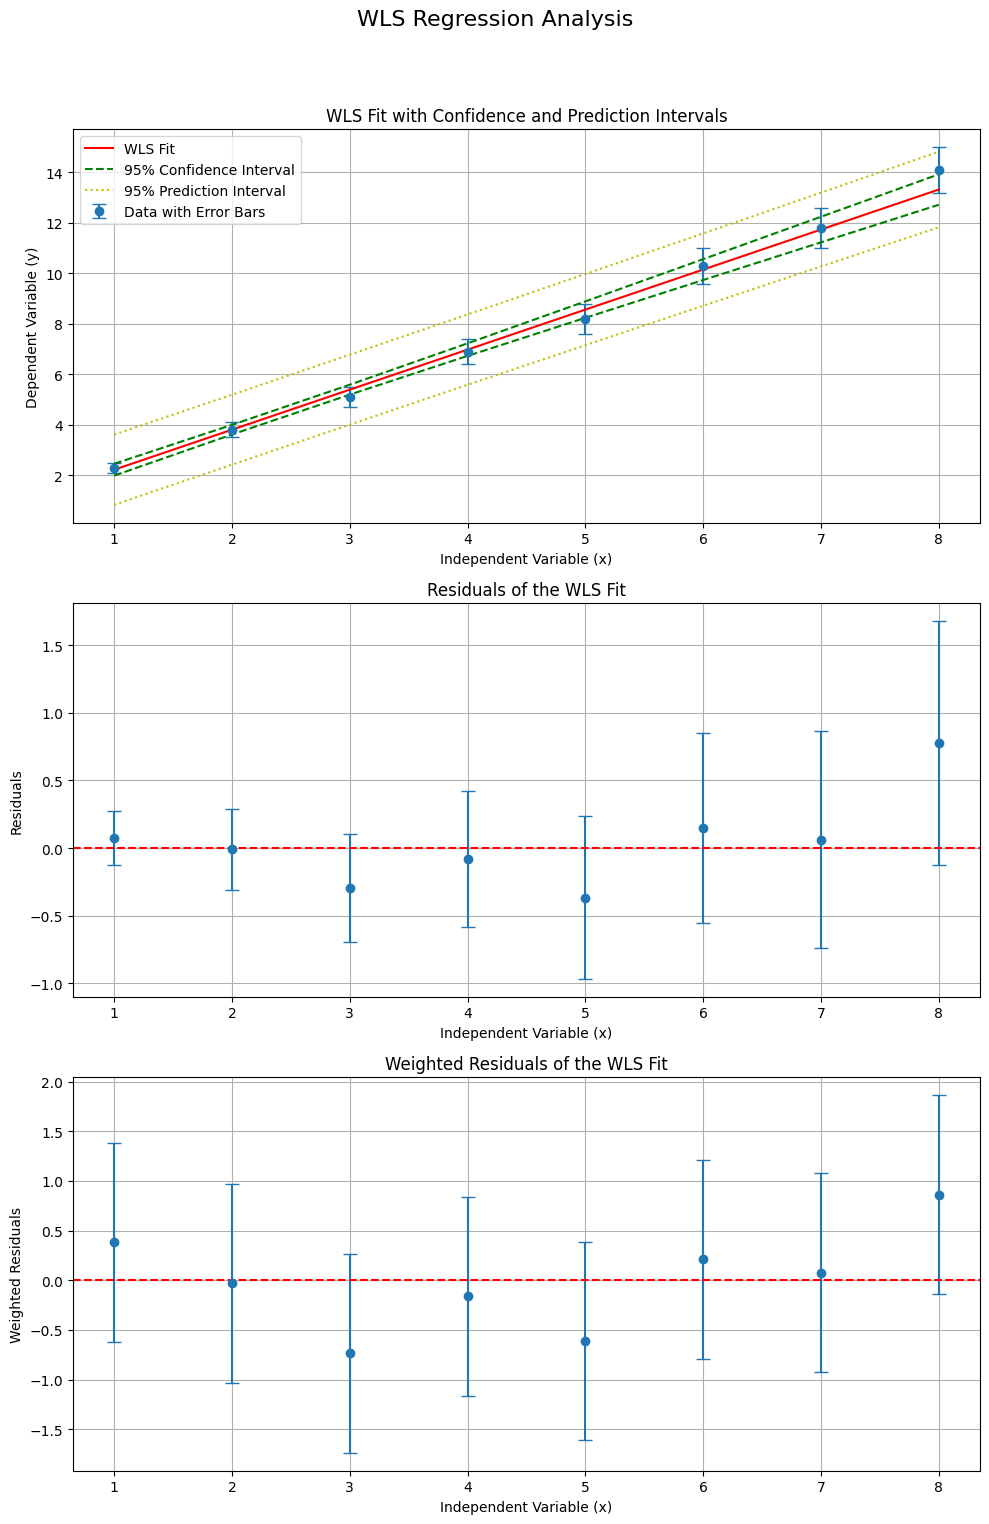

In [22]:
# --- Generate and display plots ---

residuals = results.resid  # Unweighted residuals

weighted_residuals = results.wresid  # Weighted residuals

weighted_sigma = sigma * np.sqrt(weights) # This gives us an array with the values of 1 for each observation
print(f"Weighted Sigma: {weighted_sigma}")

# Create a figure and axes for the plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 16))
fig.suptitle('WLS Regression Analysis', fontsize=16)

# --- Plot 1: WLS Fit with Confidence and Prediction Intervals ---
ax1.errorbar(x, y_obs, yerr=sigma, fmt='o', label='Data with Error Bars', capsize=5)
ax1.plot(x, results.fittedvalues, 'r-', label='WLS Fit')

# Get prediction intervals
predictions = results.get_prediction(X)
prediction_summary = predictions.summary_frame(alpha=0.05)

# Plot confidence and prediction intervals
ax1.plot(x, prediction_summary['mean_ci_lower'], 'g--', label='95% Confidence Interval')
ax1.plot(x, prediction_summary['mean_ci_upper'], 'g--')
ax1.plot(x, prediction_summary['obs_ci_lower'], 'y:', label='95% Prediction Interval')
ax1.plot(x, prediction_summary['obs_ci_upper'], 'y:')

ax1.set_xlabel("Independent Variable (x)")
ax1.set_ylabel("Dependent Variable (y)")
ax1.set_title("WLS Fit with Confidence and Prediction Intervals")
ax1.legend()
ax1.grid(True)


# --- Plot 2: Residuals Plot ---
ax2.errorbar(x, residuals, yerr=sigma, fmt='o', capsize=5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel("Independent Variable (x)")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals of the WLS Fit")
ax2.grid(True)

# --- Plot 3: Weighted Residuals Plot ---
ax3.errorbar(x, weighted_residuals, yerr=weighted_sigma, fmt='o', capsize=5)
ax3.axhline(y=0, color='r', linestyle='--')
ax3.set_xlabel("Independent Variable (x)")
ax3.set_ylabel("Weighted Residuals")
ax3.set_title("Weighted Residuals of the WLS Fit")
ax3.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Confidence and Prediction Intervals

When you use `results.get_prediction(X).summary_frame()`, you are generating confidence and prediction intervals for your model's predictions. Here's a breakdown of what each of these columns in the resulting DataFrame represents:

### Confidence Interval: `mean_ci_lower` and `mean_ci_upper`

These two columns define the **confidence interval for the mean prediction**. In simpler terms, they provide a range in which the *average* value of the outcome is likely to fall for a given set of input values.

*   `mean_ci_lower`: This is the lower bound of the 95% confidence interval for the predicted mean.
*   `mean_ci_upper`: This is the upper bound of the 95% confidence interval for the predicted mean.

A 95% confidence interval means that if you were to repeatedly draw new samples and re-run your regression, 95% of the calculated confidence intervals would contain the TRUE average value of the population. It essentially quantifies the uncertainty around the estimated regression line itself. Additional notes:
- In frequentist statistics, the true population mean (or the true regression coefficient) is considered a fixed, single value. It does not vary.
- Each time you draw a new random sample from the population, you will get a slightly different sample mean and, therefore, a slightly different confidence interval.
- Imagine you and 99 other researchers all study the same phenomenon. You each collect your own random sample and each compute a 95% confidence interval. The "95% confidence" means we would expect about 95 of those 100 different confidence intervals to successfully "capture" the true, fixed population parameter. The other 5 researchers would have been unlucky and their intervals would not contain the true value. The problem is, when you do your one study, you only have your one interval. You cannot know if you are in the lucky 95% or the unlucky 5%.

### Prediction Interval: `obs_ci_lower` and `obs_ci_upper`

These columns define the **prediction interval for a single observation**. This interval is wider than the confidence interval because it accounts for two sources of uncertainty:

1.  The uncertainty in the estimate of the mean (the regression line).
2.  The inherent random variation of individual data points around the mean.

*   `obs_ci_lower`: This is the lower bound of the 95% prediction interval for a new observation.
*   `obs_ci_upper`: This is the upper bound of the 95% prediction interval for a new observation.

A 95% prediction interval suggests that for a new data point, there is a 95% probability that its actual value will fall within this range.

**In summary:**

| Term | Full Name | Description |
| --- | --- | --- |
| `mean_ci_lower` | Mean Confidence Interval Lower Bound | The lower limit for the range where the *average* outcome is likely to be. |
| `mean_ci_upper` | Mean Confidence Interval Upper Bound | The upper limit for the range where the *average* outcome is likely to be. |
| `obs_ci_lower` | Observation Confidence Interval Lower Bound | The lower limit for the range where a *single new observation* is likely to fall. |
| `obs_ci_upper` | Observation Confidence Interval Upper Bound | The upper limit for the range where a *single new observation* is likely to fall. |

The `alpha=0.05` argument in `summary_frame(alpha=0.05)` call is what specifies the 95% confidence level (1 - 0.05 = 0.95). You can adjust this alpha to change the width of your intervals.

Documentation: https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_forecasting.html

### Comment about the 3rd Plot (Weighted Residuals of the WLS fit)

In our `statsmodels` Weighted Least Squares (WLS) regression analysis, using `yerr=sigma` for the error bars on the **weighted** residuals plot is **not correct**. This approach misrepresents the uncertainty associated with the weighted residuals. That's why we calculated `weighted_sigma = sigma * np.sqrt(weights)` which gives us an array populated with `1.0` values.

The purpose of using weighted residuals is to transform the residuals to a scale where they have a constant variance (a property known as homoscedasticity). In a correctly specified WLS model, the weighted residuals should have a theoretical variance of 1.

## Example 2

The only difference compared to the previous example is the initial `sigma` araay:

```python
sigma = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
```


In [23]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse

In [24]:
# Sample data from a hypothetical physics experiment
# x represents an independent variable
# y_obs represents the observed dependent variable
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y_obs = np.array([2.3, 3.8, 5.1, 6.9, 8.2, 10.3, 11.8, 14.1])

In [25]:
# Standard deviation for each data point
sigma = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [26]:
# The weights for WLS are the inverse of the variance (1 / sigma^2)
weights = 1.0 / (sigma**2)

# Add a constant to the independent variable to include an intercept in the model
X = sm.add_constant(x)

In [27]:
# Fit the Weighted Least Squares model
wls_model = sm.WLS(y_obs, X, weights=weights)
results = wls_model.fit()

# --- Print the detailed summary of the regression ---
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1132.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           4.59e-08
Time:                        18:07:08   Log-Likelihood:                -1.0822
No. Observations:                   8   AIC:                             6.164
Df Residuals:                       6   BIC:                             6.323
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3393      0.249      1.361      0.2

### Output Analysis

$t \approx 1.361$ is too low for $\beta_0$ which causes the $P>|t| \approx 0.222$ value to be greater than the threshold for significance $\alpha=0.05$. Thus, we cannot reject the null hypothesis for $\beta_0$. Thus the obtained estimate of $\beta_0 = 0.3393$ is not statistically significant. Also, as we can see from the confidence interval ([0.025 0.975]), this confidence interval from -0.271 to 0.949 contains zero value as well.

In [28]:
# Degrees of Freedom
degrees_of_freedom = results.df_resid
print(f"Degrees of Freedom: {degrees_of_freedom}")

n = results.nobs
print(f"Number of Observations: {n}")

condition_number = results.condition_number
print(f"Condition Number: {condition_number}")

Degrees of Freedom: 6.0
Number of Observations: 8.0
Condition Number: 11.478428240732693


In [29]:
t_value_intercept = results.tvalues[0]
print(f"T-value for Intercept: {t_value_intercept}")

t_value_slope = results.tvalues[1]
print(f"T-value for Slope: {t_value_slope}")

T-value for Intercept: 1.3612466734221584
T-value for Slope: 33.64621914609759


In [30]:
p_value_intercept = results.pvalues[0]
print(f"P-value for Intercept: {p_value_intercept}")

p_value_slope = results.pvalues[1]
print(f"P-value for Slope: {p_value_slope}")

P-value for Intercept: 0.22233728808292874
P-value for Slope: 4.588381846337238e-08


In [31]:
p_value_intercept_scipy = stats.t.sf(np.abs(t_value_intercept), df=degrees_of_freedom) * 2  # two-tailed p-value
print(f"P-value for Intercept (SciPy): {p_value_intercept_scipy}")

p_value_slope_scipy = stats.t.sf(np.abs(t_value_slope), df=degrees_of_freedom) * 2  # two-tailed p-value
print(f"P-value for Slope (SciPy): {p_value_slope_scipy}")


P-value for Intercept (SciPy): 0.22233728808292874
P-value for Slope (SciPy): 4.588381846337238e-08


In [32]:
# --- 1) Calculate RSS using results.resid (unweighted residuals) ---
rss_unweighted = np.sum(results.resid**2)
print(f"1) RSS from unweighted residuals (results.resid): {rss_unweighted:.4f}")


# --- 2) Calculate RSS using results.wresid (weighted residuals) ---
# This is the value that WLS minimizes.
rss_weighted_from_wresid = np.sum(results.wresid**2)
print(f"2) Weighted RSS from weighted residuals (results.wresid): {rss_weighted_from_wresid:.4f}")

rss_weighted_sm = results.ssr
print(f"3) Weighted RSS from results.ssr: {rss_weighted_sm:.4f}")


# --- 3) Calculate RSS manually using the linear equation ---
# Get the coefficients from the model results
intercept, slope = results.params
# Calculate the predicted y values
y_pred = intercept + slope * x
# Calculate the residuals manually
manual_residuals = y_obs - y_pred
# Square and sum the residuals
rss_unweighted_manual = np.sum(manual_residuals**2)
print(f"4) Manually calculated RSS (unweighted): {rss_unweighted_manual:.4f}")


# --- 4) Calculate weighted RSS manually ---
# Use the manual residuals and the weights
manual_weighted_residuals_sq = (manual_residuals**2) * weights
rss_weighted_manual = np.sum(manual_weighted_residuals_sq)
print(f"5) Manually calculated Weighted RSS: {rss_weighted_manual:.4f}")

# --- Verification ---
# Note that the unweighted RSS values from (1) and (3) should be identical.
# The weighted RSS values from (2) and (4) should also be identical.
# The small differences might occur due to floating-point precision.

1) RSS from unweighted residuals (results.resid): 0.6139
2) Weighted RSS from weighted residuals (results.wresid): 2.4557
3) Weighted RSS from results.ssr: 2.4557
4) Manually calculated RSS (unweighted): 0.6139
5) Manually calculated Weighted RSS: 2.4557


In [33]:
# 1) print tss value using results.centered_tss
centered_tss_sm = results.centered_tss
print(f"Total weighted sum of squares centered about the mean (statsmodels results.centered_tss): {centered_tss_sm:.4f}")

# 2) print tss value using results.uncentered_tss
uncentered_tss_sm = results.uncentered_tss
print(f"Uncentered total weighted sum of squares (statsmodels results.uncentered_tss): {uncentered_tss_sm:.4f}")

# 3) calculate centered_tss manually
# First, calculate the weighted mean of y_obs
weighted_mean_y = np.sum(weights * y_obs) / np.sum(weights)
# Then, calculate the centered_tss using the formula
weighted_centered_tss_manual = np.sum(weights * (y_obs - weighted_mean_y)**2)
print(f"\nManual calculation of total (weighted) sum of squares centered about the mean: {weighted_centered_tss_manual:.4f}")

# 4) calculate uncentered_tss manually
# The formula is the sum of weighted squared y values
weighted_uncentered_tss_manual = np.sum(weights * y_obs**2)
print(f"Manual calculation of uncentered total (weighted) sum of squares: {weighted_uncentered_tss_manual:.4f}")

# --- Manual Unweighted Calculations ---

# 5) calculate unweighted centered_tss manually
# First, calculate the standard (unweighted) mean of y_obs
unweighted_mean_y = np.mean(y_obs)
# Then, calculate the unweighted centered_tss
# Formula: sum((y_obs - mean(y_obs))^2)
unweighted_centered_tss_manual = np.sum((y_obs - unweighted_mean_y)**2)
print(f"\nManual calculation of unweighted TSS centered about the mean: {unweighted_centered_tss_manual:.4f}")

# 6) calculate unweighted uncentered_tss manually
# The formula is the sum of squared y values without weighting
# Formula: sum(y_obs^2)
unweighted_uncentered_tss_manual = np.sum(y_obs**2)
print(f"Manual calculation of uncentered unweighted TSS: {unweighted_uncentered_tss_manual:.4f}")

Total weighted sum of squares centered about the mean (statsmodels results.centered_tss): 465.7950
Uncentered total weighted sum of squares (statsmodels results.uncentered_tss): 2418.9200

Manual calculation of total (weighted) sum of squares centered about the mean: 465.7950
Manual calculation of uncentered total (weighted) sum of squares: 2418.9200

Manual calculation of unweighted TSS centered about the mean: 116.4488
Manual calculation of uncentered unweighted TSS: 604.7300


In [34]:
ess = results.ess # The explained sum of squares.
print(f"Weighted Explained Sum of Squares (ESS): {ess:.4f}")

# Manually calculate the ESS
# Get the fitted values (y_hat) from the model
y_hat = results.predict(X)

# Calculate the weighted mean of y_obs
weighted_mean_y = np.sum(weights * y_obs) / np.sum(weights)

# Calculate ESS using the formula: sum(weights * (y_hat - weighted_mean_y)^2)
ess_weighted_manual = np.sum(weights * (y_hat - weighted_mean_y)**2)
print(f"Weighted Explained Sum of Squares (ESS) manual calculation: {ess_weighted_manual:.4f}")

# Calculate the unweighted mean of y_obs
unweighted_mean_y = np.mean(y_obs)

# Finally, calculate the unweighted ESS using the formula: sum((y_hat - unweighted_mean_y)^2)
ess_unweighted_manual = np.sum((y_hat - unweighted_mean_y)**2)
print(f"Explained Sum of Squares (ESS) unweighted manual calculation: {ess_unweighted_manual:.4f}")

Weighted Explained Sum of Squares (ESS): 463.3393
Weighted Explained Sum of Squares (ESS) manual calculation: 463.3393
Explained Sum of Squares (ESS) unweighted manual calculation: 115.8348


In [35]:
# Get the number of observations and parameters
n = results.nobs
p = results.df_model + 1  # df_model is number of explanatory variables, add 1 for intercept

print(f"Number of observations (n): {n}")
print(f"Number of parameters (p): {p}")

Number of observations (n): 8.0
Number of parameters (p): 2.0


In [36]:
r_squared = results.rsquared
print(f"Weighted R-squared (statsmodels results.rsquared): {r_squared:.6f}")

r_squared_adj = results.rsquared_adj
print(f"Weighted Adjusted R-squared (statsmodels results.rsquared_adj): {r_squared_adj:.6f}")

# --- Manual calculation of Weighted R-squared ---

r_squared_manual_weighted = 1 - rss_weighted_manual / weighted_centered_tss_manual
print(f"\nManual Weighted R-squared (1 - RSS_w/TSS_w): {r_squared_manual_weighted:.6f}")

# Manual calculation of Weighted Adjusted R-squared
# Formula: 1 - (1 - R^2_w) * ((n-1)/(n-p))
r_squared_adj_manual_weighted = 1 - (1 - r_squared_manual_weighted) * ((n - 1) / (n - p))
print(f"Manual Weighted Adjusted R-squared: {r_squared_adj_manual_weighted:.6f}")

# --- Manual calculation of Unweighted R-squared ---
# We need to calculate the unweighted centered TSS first
unweighted_mean_y = np.mean(y_obs)
unweighted_centered_tss = np.sum((y_obs - unweighted_mean_y)**2)

r_squared_manual_unweighted = 1 - rss_unweighted_manual / unweighted_centered_tss
print(f"\nManual Unweighted R-squared (1 - RSS/TSS): {r_squared_manual_unweighted:.6f}")

# Manual calculation of Unweighted Adjusted R-squared
# Formula: 1 - (1 - R^2_unweighted) * ((n-1)/(n-p))
r_squared_adj_manual_unweighted = 1 - (1 - r_squared_manual_unweighted) * ((n - 1) / (n - p))
print(f"Manual Unweighted Adjusted R-squared: {r_squared_adj_manual_unweighted:.6f}")

# Formula: ESS_weighted / TSS_centered_weighted
r_squared_manual_weighted_2 = ess_weighted_manual / weighted_centered_tss_manual
print(f"\nManual Weighted R-squared (alternative formula) (ESS_w/TSS_w): {r_squared_manual_weighted_2:.6f}")

# Formula: ESS_unweighted / TSS_centered_unweighted
r_squared_manual_unweighted_2 = ess_unweighted_manual / unweighted_centered_tss
print(f"Manual Unweighted R-squared alternative formula (ESS/TSS): {r_squared_manual_unweighted_2:.6f}")

Weighted R-squared (statsmodels results.rsquared): 0.994728
Weighted Adjusted R-squared (statsmodels results.rsquared_adj): 0.993849

Manual Weighted R-squared (1 - RSS_w/TSS_w): 0.994728
Manual Weighted Adjusted R-squared: 0.993849

Manual Unweighted R-squared (1 - RSS/TSS): 0.994728
Manual Unweighted Adjusted R-squared: 0.993849

Manual Weighted R-squared (alternative formula) (ESS_w/TSS_w): 0.994728
Manual Unweighted R-squared alternative formula (ESS/TSS): 0.994728


NOTE: When all of the $\sigma_i$ values are the same, weighted and unweighted versions of R-squared and Adjusted R-square have the same values.

In [37]:
# Chi-Squared
chi_squared = np.sum(((y_obs - results.predict()) / sigma)**2)
print(f"Chi-Squared: {chi_squared:.4f}")

# Reduced Chi-Squared
reduced_chi_squared = chi_squared / degrees_of_freedom
print(f"Reduced Chi-Squared: {reduced_chi_squared:.4f}")

Chi-Squared: 2.4557
Reduced Chi-Squared: 0.4093


NOTE: While the estimated value of $\beta_0$ is not statistically significant, Reduced Chi-Squared value is low and less than 1 which is good. This means that probably our standard deviations (measurement uncertainties) are overestimated. 

If we can increase the accuracy of our measurements and decrease measurement uncertainties from 0.5 to, for example, 0.3, the reduced chi-squared value will be increased but it doesn't necessarily change the $P>|t|$ value for $\beta_0$ (you can open this code in Google Colab using the appropriate icon in the top Action pane, try to change all the `sigma` values from 0.5 to 0.3 and double-check that this will not affect anything related to $\beta_0$).

In [38]:
# --- Root Mean Squared Error (RMSE) Calculations ---
print("\n--- Root Mean Squared Error (RMSE) ---")

# RMSE from statsmodels (this is an unweighted RMSE)
rmse_val = rmse(y_obs, results.fittedvalues)
print(f"RMSE (statsmodels.tools.eval_measures.rmse method): {rmse_val:.4f}")

# Manual calculation of Unweighted RMSE
# Formula: sqrt(sum of squared unweighted residuals / number of observations)
rmse_manual_unweighted = np.sqrt(rss_unweighted_manual / n)
print(f"Manual Unweighted RMSE: {rmse_manual_unweighted:.4f}")

# Manual calculation of Weighted RMSE
# Formula: sqrt(sum of squared weighted residuals / sum of weights)
rmse_manual_weighted = np.sqrt(rss_weighted_manual / np.sum(weights))
print(f"Manual Weighted RMSE: {rmse_manual_weighted:.4f}")


--- Root Mean Squared Error (RMSE) ---
RMSE (statsmodels.tools.eval_measures.rmse method): 0.2770
Manual Unweighted RMSE: 0.2770
Manual Weighted RMSE: 0.2770


In [39]:
# --- Standard Error of the Regression (SER) Calculations ---
print("\n--- Standard Error of the Regression (SER) ---")

# SER from statsmodels results (this is a weighted SER)
# It is the square root of the weighted RSS divided by the degrees of freedom
ser_sm = np.sqrt(results.ssr / results.df_resid)
print(f"SER (from statsmodels results): {ser_sm:.4f}")

# Manual calculation of Weighted SER
# This should match the value from statsmodels
# Formula: sqrt(sum of squared weighted residuals / degrees of freedom)
ser_manual_weighted = np.sqrt(rss_weighted_manual / degrees_of_freedom)
print(f"Manual Weighted SER: {ser_manual_weighted:.4f}")

# Manual calculation of Unweighted SER
# Formula: sqrt(sum of squared unweighted residuals / degrees of freedom)
ser_manual_unweighted = np.sqrt(rss_unweighted_manual / degrees_of_freedom)
print(f"Manual Unweighted SER: {ser_manual_unweighted:.4f}")


--- Standard Error of the Regression (SER) ---
SER (from statsmodels results): 0.6398
Manual Weighted SER: 0.6398
Manual Unweighted SER: 0.3199


In [40]:
n = results.nobs
p = results.df_model + 1

# --- MSE values from statsmodels results ---
print("--- Statsmodels Results (Weighted) ---")
mse_model_sm = results.mse_model
print(f"Mean Squared Error of the Model (mse_model): {mse_model_sm:.4f}")

mse_resid_sm = results.mse_resid
print(f"Mean Squared Error of the Residuals (MSE) (mse_resid): {mse_resid_sm:.4f}")

mse_total_sm = results.mse_total
print(f"Total Mean Squared Error (mse_total): {mse_total_sm:.4f}")

# --- Manual Calculations ---
print("\n--- Manual Calculations ---")

# 1. MSE Model
mse_model_manual_weighted = ess_weighted_manual / (p - 1)
mse_model_manual_unweighted = ess_unweighted_manual / (p - 1)
print(f"Manual Weighted mse_model: {mse_model_manual_weighted:.4f} (Should match statsmodels)")
print(f"Manual Unweighted mse_model: {mse_model_manual_unweighted:.4f}")

# 2. MSE Residuals
mse_resid_manual_weighted = rss_weighted_manual / (n - p)
mse_resid_manual_unweighted = rss_unweighted_manual / (n - p)
print(f"\nManual Weighted mse_resid: {mse_resid_manual_weighted:.4f} (Should match statsmodels)")
print(f"Manual Unweighted mse_resid: {mse_resid_manual_unweighted:.4f}")

# 3. MSE Total
mse_total_manual_weighted = weighted_centered_tss_manual / (n - 1)
mse_total_manual_unweighted = unweighted_centered_tss_manual / (n - 1)
print(f"\nManual Weighted mse_total: {mse_total_manual_weighted:.4f} (Should match statsmodels)")
print(f"Manual Unweighted mse_total: {mse_total_manual_unweighted:.4f}")

--- Statsmodels Results (Weighted) ---
Mean Squared Error of the Model (mse_model): 463.3393
Mean Squared Error of the Residuals (MSE) (mse_resid): 0.4093
Total Mean Squared Error (mse_total): 66.5421

--- Manual Calculations ---
Manual Weighted mse_model: 463.3393 (Should match statsmodels)
Manual Unweighted mse_model: 115.8348

Manual Weighted mse_resid: 0.4093 (Should match statsmodels)
Manual Unweighted mse_resid: 0.1023

Manual Weighted mse_total: 66.5421 (Should match statsmodels)
Manual Unweighted mse_total: 16.6355


In [41]:
# Unbiased Scale using results.scale
unbiased_scale_sm = results.scale # ssr / df_resid
print(f"Unbiased Scale (statsmodels results.scale): {unbiased_scale_sm:.4f}")

# Degrees of Freedom
degrees_of_freedom = results.df_resid
print(f"Degrees of Freedom: {degrees_of_freedom}")

rss_weighted_sm = results.ssr # Weighted Sum of Squared Residuals
print(f"Weighted Sum of Squared Residuals (statsmodels results.ssr): {rss_weighted_sm:.4f}")

unbiased_scale_sm_rss = rss_weighted_sm / degrees_of_freedom
print(f"Unbiased Scale (weighted RSS / degrees of freedom): {unbiased_scale_sm_rss:.4f}")

Unbiased Scale (statsmodels results.scale): 0.4093
Degrees of Freedom: 6.0
Weighted Sum of Squared Residuals (statsmodels results.ssr): 2.4557
Unbiased Scale (weighted RSS / degrees of freedom): 0.4093


In [42]:
print("--- Information Criteria from statsmodels ---")

llf = results.llf # Log-likelihood of model
print(f"Maximum Log-Likelihood of the Model (results.llf) from statsmodels: {llf:.4f}")

aic = results.aic
print(f"Akaike Information Criterion AIC (results.aic) from statsmodels: {aic:.4f}")

bic = results.bic
print(f"Bayesian Information Criterion BIC (results.bic) from statsmodels: {bic:.4f}")


# --- Manual Calculations ---
print("\n--- Manual Calculation Verification ---")

n = results.nobs
p = results.df_model + 1
rss_w = results.ssr # Weighted sum of squared residuals

# First, calculate the Maximum Likelihood Estimate for the scale/variance parameter
mle_variance = rss_w / n
print(f"MLE for variance (RSS_w / n): {mle_variance:.4f}")

# Now, use the simplified formula derived from substituting the MLE scale
term1 = -n / 2 * (np.log(2 * np.pi) + 1)
term2 = -n / 2 * np.log(mle_variance)
term3 = 0.5 * np.sum(np.log(weights))
llf_manual_correct = term1 + term2 + term3

print(f"\nMaximum Log-Likelihood calculated using the formula: {llf_manual_correct:.4f}")

aic = -2 * llf_manual_correct + 2 * p  # p = 2 parameters (intercept and slope)
print(f"Manual AIC: {aic:.4f}")

bic = -2 * llf_manual_correct + np.log(n) * p
print(f"Manual BIC: {bic:.4f}")

aicc = aic + (2 * p * (p + 1)) / (n - p - 1)
print(f"Manual AICc (Corrected Akaike Information Criterion): {aicc:.4f}")

--- Information Criteria from statsmodels ---
Maximum Log-Likelihood of the Model (results.llf) from statsmodels: -1.0822
Akaike Information Criterion AIC (results.aic) from statsmodels: 6.1645
Bayesian Information Criterion BIC (results.bic) from statsmodels: 6.3234

--- Manual Calculation Verification ---
MLE for variance (RSS_w / n): 0.3070

Maximum Log-Likelihood calculated using the formula: -1.0822
Manual AIC: 6.1645
Manual BIC: 6.3234
Manual AICc (Corrected Akaike Information Criterion): 8.5645


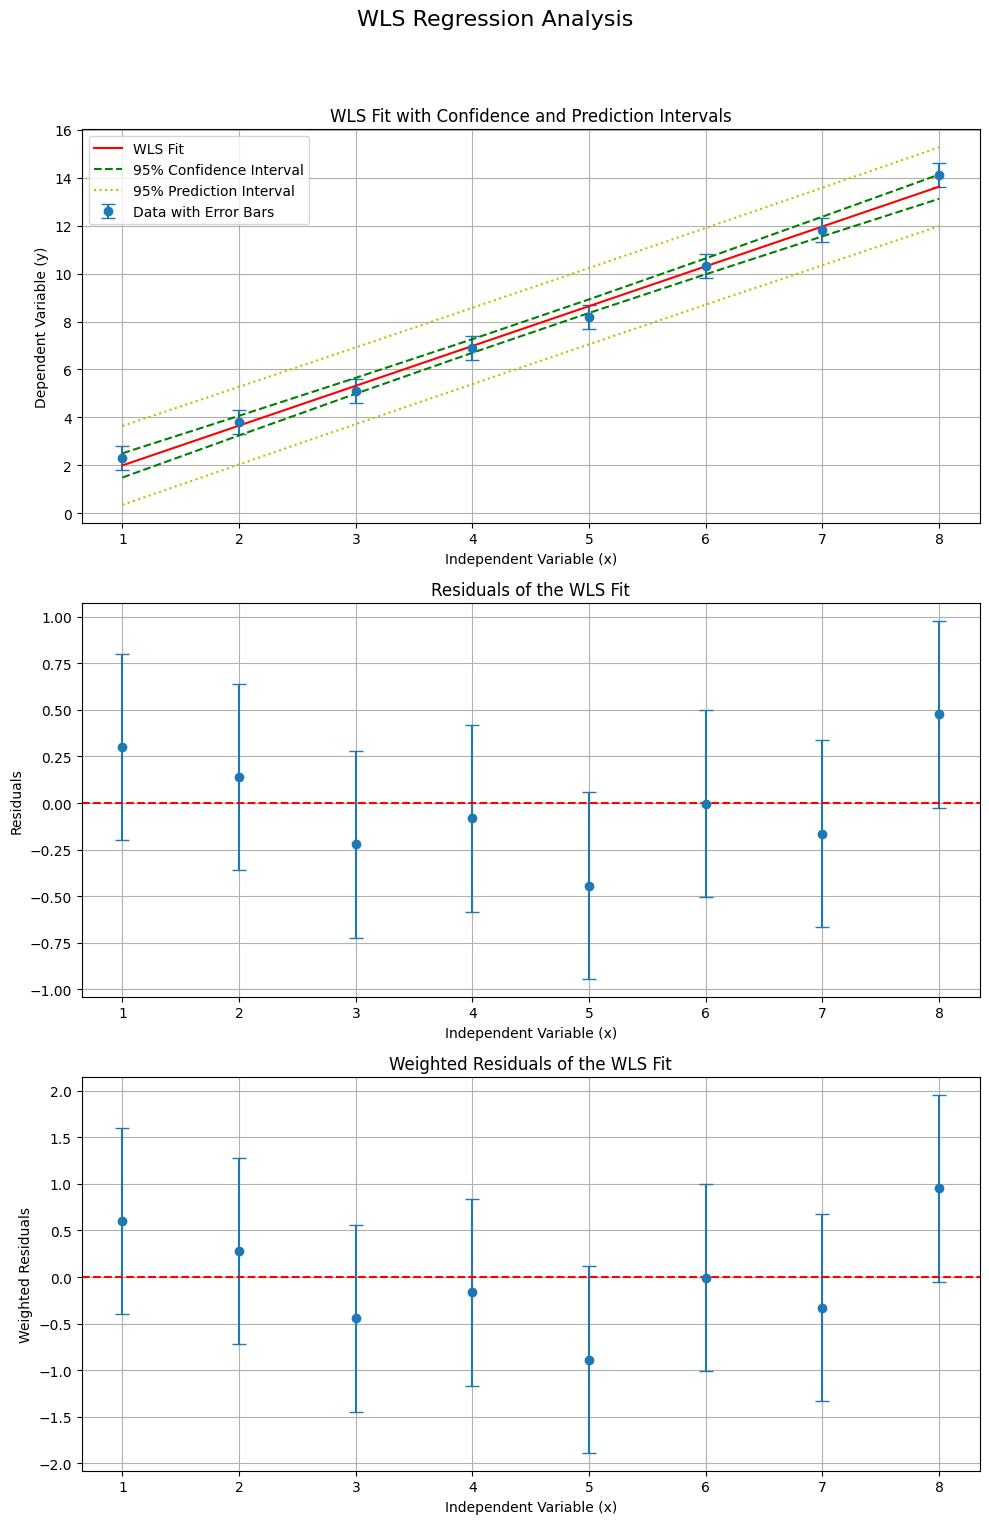

In [43]:
# --- Generate and display plots ---

residuals = results.resid  # Unweighted residuals

weighted_residuals = results.wresid  # Weighted residuals

weighted_sigma = sigma * np.sqrt(weights) # This gives us an array with the values of 1 for each observation


# Create a figure and axes for the plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 16))
fig.suptitle('WLS Regression Analysis', fontsize=16)

# --- Plot 1: WLS Fit with Confidence and Prediction Intervals ---
ax1.errorbar(x, y_obs, yerr=sigma, fmt='o', label='Data with Error Bars', capsize=5)
ax1.plot(x, results.fittedvalues, 'r-', label='WLS Fit')

# Get prediction intervals
predictions = results.get_prediction(X)
prediction_summary = predictions.summary_frame(alpha=0.05)

# Plot confidence and prediction intervals
ax1.plot(x, prediction_summary['mean_ci_lower'], 'g--', label='95% Confidence Interval')
ax1.plot(x, prediction_summary['mean_ci_upper'], 'g--')
ax1.plot(x, prediction_summary['obs_ci_lower'], 'y:', label='95% Prediction Interval')
ax1.plot(x, prediction_summary['obs_ci_upper'], 'y:')

ax1.set_xlabel("Independent Variable (x)")
ax1.set_ylabel("Dependent Variable (y)")
ax1.set_title("WLS Fit with Confidence and Prediction Intervals")
ax1.legend()
ax1.grid(True)


# --- Plot 2: Residuals Plot ---
ax2.errorbar(x, residuals, yerr=sigma, fmt='o', capsize=5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel("Independent Variable (x)")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals of the WLS Fit")
ax2.grid(True)

# --- Plot 3: Weighted Residuals Plot ---
ax3.errorbar(x, weighted_residuals, yerr=weighted_sigma, fmt='o', capsize=5)
ax3.axhline(y=0, color='r', linestyle='--')
ax3.set_xlabel("Independent Variable (x)")
ax3.set_ylabel("Weighted Residuals")
ax3.set_title("Weighted Residuals of the WLS Fit")
ax3.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Example 3

We will model the same case but using `scipy` library and `curve_fit` method from that library. The `sigma` values are the same as in Example 1:

```python
sigma = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
```

In [44]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [45]:
# Sample data from a hypothetical physics experiment
# x represents an independent variable
# y_obs represents the observed dependent variable
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y_obs = np.array([2.3, 3.8, 5.1, 6.9, 8.2, 10.3, 11.8, 14.1])

# Standard deviation for each data point
sigma = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# The weights for WLS are the inverse of the variance (1 / sigma^2)
weights = 1.0 / (sigma**2)

In [46]:
# Define the linear model function for curve_fit
def linear_func(x, b0, b1):
    return b0 + b1 * x

### Absolute sigma parameter

Note, that `curve_fit` provides the same result for standard errors as `statsmodels` approach in a case if `absolute_sigma=False`. However, if `absolute_sigma=True`, the estimated values of intercept $\beta_0$ and slope $\beta_1$ do not change, but standard errors become different. This is because if `absolute_sigma=True`, then `curve_fit` considers `sigma` not just for calculating the weights; it considers `sigma` as standard deviations of measurements that should not be reestimated again.

below, we will proceed with both cases to compare the results between both options and between `statsmodels` and `scipy` in general.

### `absolute_sigma=False`

In [47]:
# --- Fit the model using scipy.optimize.curve_fit ---
# popt: Optimal values for the parameters (b0, b1)
# pcov: The estimated covariance matrix of popt
popt, pcov = curve_fit(linear_func, x, y_obs, sigma=sigma, absolute_sigma=False)

# Standard errors are the sqrt of the diagonal of the covariance matrix
perr = np.sqrt(np.diag(pcov))
std_err_intercept = perr[0]
std_err_slope = perr[1]

# Extract the fitted parameters (intercept and slope)
intercept, slope = popt
print("--- Fitted Parameters ---")
print(f"Intercept (beta_0): {intercept:.4f} +/- {std_err_intercept:.4f}")
print(f"Slope (beta_1): {slope:.4f} +/- {std_err_slope:.4f}")

--- Fitted Parameters ---
Intercept (beta_0): 0.6375 +/- 0.1255
Slope (beta_1): 1.5857 +/- 0.0417


In [48]:
# Check condition number of the covariance matrix
print(f"Condition number of the covariance matrix: {np.linalg.cond(pcov):.2f}")

Condition number of the covariance matrix: 28.17


In [49]:
# --- Calculate Model Predictions and Residuals ---
y_pred = linear_func(x, intercept, slope)
residuals = y_obs - y_pred
weighted_residuals = (y_obs - y_pred) / sigma # same as residuals * sqrt(weights)

# --- Basic Fit Information ---
print("\n--- Basic Fit Information ---")
n = len(x)  # Number of observations
p = len(popt) # Number of parameters (intercept, slope)
degrees_of_freedom = n - p # Degrees of Freedom
print(f"Number of Observations (n): {n}")
print(f"Number of Parameters (p): {p}")
print(f"Degrees of Freedom (degrees_of_freedom): {degrees_of_freedom}")


--- Basic Fit Information ---
Number of Observations (n): 8
Number of Parameters (p): 2
Degrees of Freedom (degrees_of_freedom): 6


In [50]:
# --- Hypothesis Testing: t-values and p-values ---
print("\n--- Hypothesis Testing ---")

# Calculate t-values
t_value_intercept = intercept / std_err_intercept
t_value_slope = slope / std_err_slope

# Calculate two-tailed p-values
p_value_intercept = stats.t.sf(np.abs(t_value_intercept), df=degrees_of_freedom) * 2
p_value_slope = stats.t.sf(np.abs(t_value_slope), df=degrees_of_freedom) * 2

print(f"Standard Error for Intercept: {std_err_intercept:.6f}")
print(f"T-value for Intercept: {t_value_intercept:.6f}")
print(f"P-value for Intercept: {p_value_intercept:.6f}")
print(f"Standard Error for Slope: {std_err_slope:.6f}")
print(f"T-value for Slope: {t_value_slope:.6f}")
print(f"P-value for Slope: {p_value_slope:.6f}")


--- Hypothesis Testing ---
Standard Error for Intercept: 0.125542
T-value for Intercept: 5.078178
P-value for Intercept: 0.002270
Standard Error for Slope: 0.041745
T-value for Slope: 37.985584
P-value for Slope: 0.000000


In [51]:
# --- Sum of Squares Calculations ---
print("\n--- Sum of Squares (SS) ---")
# Residual Sum of Squares (RSS)
rss_unweighted = np.sum(residuals**2)
rss_weighted = np.sum(weighted_residuals**2) # This is also the Chi-Squared value
print(f"\nWeighted Residual Sum of Squares (Weighted RSS): {rss_weighted:.4f}")
print(f"Unweighted Residual Sum of Squares (RSS): {rss_unweighted:.4f}")

# Total Sum of Squares (TSS)
weighted_mean_y = np.sum(weights * y_obs) / np.sum(weights)
unweighted_mean_y = np.mean(y_obs)
weighted_centered_tss = np.sum(weights * (y_obs - weighted_mean_y)**2)
unweighted_centered_tss = np.sum((y_obs - unweighted_mean_y)**2)
print(f"\nWeighted Centered Total Sum of Squares (TSS): {weighted_centered_tss:.4f}")
print(f"Unweighted Centered Total Sum of Squares (TSS): {unweighted_centered_tss:.4f}")

# Uncentered Total Sum of Squares (TSS)
weighted_uncentered_tss = np.sum(weights * (y_obs)**2)
unweighted_uncentered_tss = np.sum((y_obs)**2)
print(f"\nWeighted Uncentered Total Sum of Squares (TSS): {weighted_uncentered_tss:.4f}")
print(f"Unweighted Uncentered Total Sum of Squares (TSS): {unweighted_uncentered_tss:.4f}")

# Explained Sum of Squares (ESS)
ess_weighted = np.sum(weights * (y_pred - weighted_mean_y)**2)
ess_unweighted = np.sum((y_pred - unweighted_mean_y)**2)
print(f"\nWeighted Explained Sum of Squares (ESS): {ess_weighted:.4f}")
print(f"Unweighted Explained Sum of Squares (ESS): {ess_unweighted:.4f}")


--- Sum of Squares (SS) ---

Weighted Residual Sum of Squares (Weighted RSS): 1.8848
Unweighted Residual Sum of Squares (RSS): 0.8626

Weighted Centered Total Sum of Squares (TSS): 455.1540
Unweighted Centered Total Sum of Squares (TSS): 116.4488

Weighted Uncentered Total Sum of Squares (TSS): 1511.9919
Unweighted Uncentered Total Sum of Squares (TSS): 604.7300

Weighted Explained Sum of Squares (ESS): 453.2692
Unweighted Explained Sum of Squares (ESS): 105.6192


In [52]:
# --- Goodness-of-Fit Metrics ---
print("\n--- Goodness-of-Fit ---")

# R-squared
r_squared_weighted = 1 - rss_weighted / weighted_centered_tss
r_squared_unweighted = 1 - rss_unweighted / unweighted_centered_tss
print(f"\nWeighted R-squared: {r_squared_weighted:.4f}")
print(f"Unweighted R-squared: {r_squared_unweighted:.4f}")

# Adjusted R-squared
r_squared_adj_weighted = 1 - (1 - r_squared_weighted) * ((n - 1) / (n - p))
r_squared_adj_unweighted = 1 - (1 - r_squared_unweighted) * ((n - 1) / (n - p))
print(f"\nWeighted Adjusted R-squared: {r_squared_adj_weighted:.4f}")
print(f"Unweighted Adjusted R-squared: {r_squared_adj_unweighted:.4f}")

# Chi-Squared and Reduced Chi-Squared
chi_squared = rss_weighted # By definition
reduced_chi_squared = chi_squared / degrees_of_freedom
print(f"\nChi-Squared: {chi_squared:.4f}")
print(f"Reduced Chi-Squared (RSS_weighted / degrees_of_freedom): {reduced_chi_squared:.4f}")


--- Goodness-of-Fit ---

Weighted R-squared: 0.9959
Unweighted R-squared: 0.9926

Weighted Adjusted R-squared: 0.9952
Unweighted Adjusted R-squared: 0.9914

Chi-Squared: 1.8848
Reduced Chi-Squared (RSS_weighted / degrees_of_freedom): 0.3141


In [53]:
# --- Error Metrics ---
print("--- Error Metrics ---")
# Root Mean Squared Error (RMSE)
rmse_unweighted = np.sqrt(rss_unweighted / n)
rmse_weighted = np.sqrt(rss_weighted / np.sum(weights))
print(f"\nUnweighted RMSE: {rmse_unweighted:.4f}")
print(f"Weighted RMSE: {rmse_weighted:.4f}")

# Standard Error of the Regression (SER)
ser_unweighted = np.sqrt(rss_unweighted / degrees_of_freedom)
ser_weighted = np.sqrt(rss_weighted / degrees_of_freedom) # Same as sqrt of reduced_chi_squared
print(f"\nUnweighted SER: {ser_unweighted:.4f}")
print(f"Weighted SER: {ser_weighted:.4f}")

# --- Mean Squared Errors (MSE) ---
print("\n--- Mean Squared Errors (MSE) ---")
mse_model_weighted = ess_weighted / (p - 1)
mse_resid_weighted = rss_weighted / (n - p) # Same as reduced chi-squared
mse_total_weighted = weighted_centered_tss / (n - 1)
print(f"\nWeighted Mean Squared Error (MSE): {mse_model_weighted:.4f}")
print(f"Weighted Residual MSE: {mse_resid_weighted:.4f}")
print(f"Weighted Total MSE: {mse_total_weighted:.4f}")

--- Error Metrics ---

Unweighted RMSE: 0.3284
Weighted RMSE: 0.1869

Unweighted SER: 0.3792
Weighted SER: 0.5605

--- Mean Squared Errors (MSE) ---

Weighted Mean Squared Error (MSE): 453.2692
Weighted Residual MSE: 0.3141
Weighted Total MSE: 65.0220


In [54]:
# --- Log-Likelihood and Information Criteria ---
print("\n--- Log-Likelihood & Information Criteria ---")
# Since absolute_sigma=False, we assume sigma is not known, but the weights are known.

# First, calculate the Maximum Likelihood Estimate for the scale/variance parameter
mle_variance = rss_weighted / n
print(f"MLE for variance (RSS_weighted / n): {mle_variance:.4f}")

term1 = -n / 2 * (np.log(2 * np.pi) + 1)
term2 = -n / 2 * np.log(mle_variance)
term3 = 0.5 * np.sum(np.log(weights))
llf = term1 + term2 + term3
print(f"Maximum Log-Likelihood: {llf:.4f}")

# Information Criteria
aic = -2 * llf + 2 * p
bic = -2 * llf + np.log(n) * p
aicc = aic + (2 * p * (p + 1)) / (n - p - 1)
print(f"AIC (Akaike Information Criterion): {aic:.4f}")
print(f"BIC (Bayesian Information Criterion): {bic:.4f}")
print(f"AICc (Corrected AIC): {aicc:.4f}")


--- Log-Likelihood & Information Criteria ---
MLE for variance (RSS_weighted / n): 0.2356
Maximum Log-Likelihood: 0.0498
AIC (Akaike Information Criterion): 3.9004
BIC (Bayesian Information Criterion): 4.0593
AICc (Corrected AIC): 6.3004


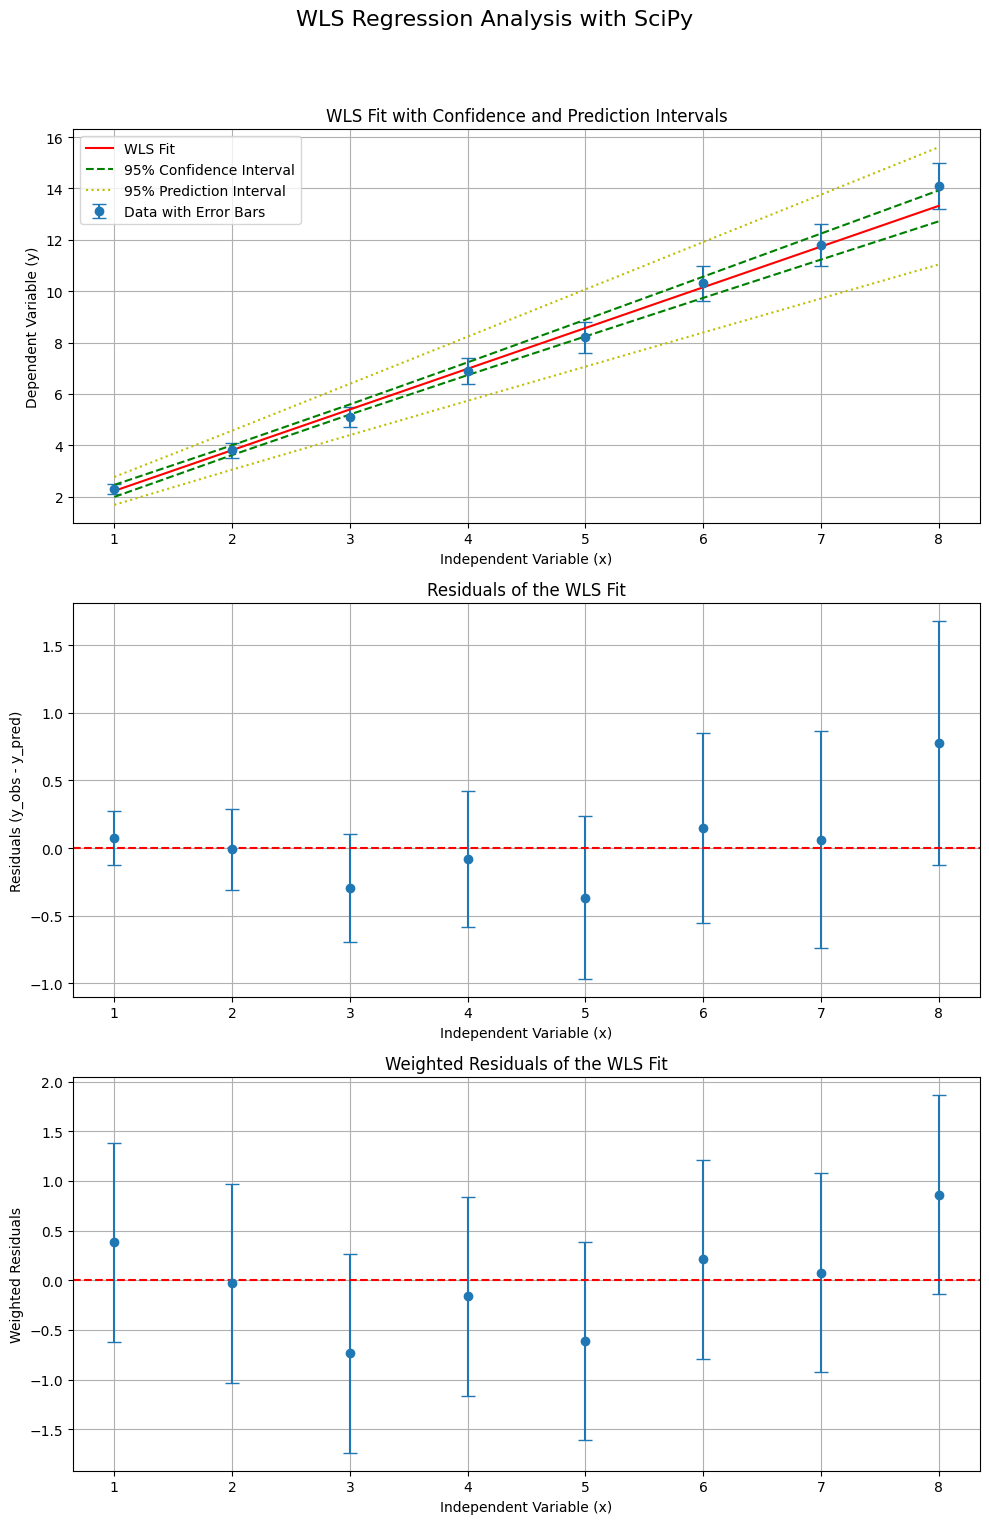

In [55]:
# --- Generate and display plots ---
# Create a matrix X for manual calculation of intervals
X = np.vstack((np.ones_like(x), x)).T

# --- Calculate Confidence and Prediction Intervals Manually ---
# Critical t-value for 95% confidence
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha / 2, df=degrees_of_freedom)

# 1. Confidence Interval for the mean response
# SE(y_hat) = sqrt(diag(X @ pcov @ X.T))
se_mean = np.sqrt(np.diag(X @ pcov @ X.T))
ci_lower = y_pred - t_crit * se_mean
ci_upper = y_pred + t_crit * se_mean

# 2. Prediction Interval for a new observation
# PI = y_hat +/- t * sqrt(sigma_i^2 + SE(y_hat)^2)
# Here sigma_i is the std dev of the individual point
se_pred = np.sqrt(sigma**2 + se_mean**2)
pi_lower = y_pred - t_crit * se_pred
pi_upper = y_pred + t_crit * se_pred

# --- Plotting ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 16))
fig.suptitle('WLS Regression Analysis with SciPy', fontsize=16)

# Plot 1: WLS Fit with Confidence and Prediction Intervals
ax1.errorbar(x, y_obs, yerr=sigma, fmt='o', label='Data with Error Bars', capsize=5)
ax1.plot(x, y_pred, 'r-', label='WLS Fit')
ax1.plot(x, ci_lower, 'g--', label='95% Confidence Interval')
ax1.plot(x, ci_upper, 'g--')
ax1.plot(x, pi_lower, 'y:', label='95% Prediction Interval')
ax1.plot(x, pi_upper, 'y:')
ax1.set_xlabel("Independent Variable (x)")
ax1.set_ylabel("Dependent Variable (y)")
ax1.set_title("WLS Fit with Confidence and Prediction Intervals")
ax1.legend()
ax1.grid(True)

# Plot 2: Residuals Plot
ax2.errorbar(x, residuals, yerr=sigma, fmt='o', capsize=5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel("Independent Variable (x)")
ax2.set_ylabel("Residuals (y_obs - y_pred)")
ax2.set_title("Residuals of the WLS Fit")
ax2.grid(True)

# Plot 3: Weighted Residuals Plot
# The error on the weighted residuals is 1.0 because they are normalized by sigma.
ax3.errorbar(x, weighted_residuals, yerr=np.ones_like(x), fmt='o', capsize=5)
ax3.axhline(y=0, color='r', linestyle='--')
ax3.set_xlabel("Independent Variable (x)")
ax3.set_ylabel("Weighted Residuals")
ax3.set_title("Weighted Residuals of the WLS Fit")
ax3.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

```{note}
The 95% prediction interval looks different on these graphs compared to the results from the `statsmodels`. The higher $x$ variable value, the higher width of the 95% prediction interval in our last graph. This is not the same as for `statsmodels` case.

The topic of prediction intervals is not considered here but probably these details will be added later.

What you can do for now:
- Try to open this whole code in Google Colab using the appropriate icon in the Action pane of this page
- Change `sigma` array to the following `sigma = np.array([0.2, 0.3, 0.4, 0.9, 0.9, 0.4, 0.5, 0.4])` and see how it will impact prediction interval on the graph.
```

### `absolute_sigma=True`

In [56]:
# --- Fit the model using scipy.optimize.curve_fit ---
# popt: Optimal values for the parameters (b0, b1)
# pcov: The estimated covariance matrix of popt
popt, pcov = curve_fit(linear_func, x, y_obs, sigma=sigma, absolute_sigma=True)

# Standard errors are the sqrt of the diagonal of the covariance matrix
perr = np.sqrt(np.diag(pcov))
std_err_intercept = perr[0]
std_err_slope = perr[1]

# Extract the fitted parameters (intercept and slope)
intercept, slope = popt
print("--- Fitted Parameters ---")
print(f"Intercept (beta_0): {intercept:.4f} +/- {std_err_intercept:.4f}")
print(f"Slope (beta_1): {slope:.4f} +/- {std_err_slope:.4f}")

--- Fitted Parameters ---
Intercept (beta_0): 0.6375 +/- 0.2240
Slope (beta_1): 1.5857 +/- 0.0745


In [57]:
# Check condition number of the covariance matrix
print(f"Condition number of the covariance matrix: {np.linalg.cond(pcov):.2f}")

Condition number of the covariance matrix: 28.17


In [58]:
# --- Calculate Model Predictions and Residuals ---
y_pred = linear_func(x, intercept, slope)
residuals = y_obs - y_pred
weighted_residuals = (y_obs - y_pred) / sigma # same as residuals * sqrt(weights)

# --- Basic Fit Information ---
print("\n--- Basic Fit Information ---")
n = len(x)  # Number of observations
p = len(popt) # Number of parameters (intercept, slope)
degrees_of_freedom = n - p # Degrees of Freedom
print(f"Number of Observations (n): {n}")
print(f"Number of Parameters (p): {p}")
print(f"Degrees of Freedom (degrees_of_freedom): {degrees_of_freedom}")


--- Basic Fit Information ---
Number of Observations (n): 8
Number of Parameters (p): 2
Degrees of Freedom (degrees_of_freedom): 6


In [59]:
# --- Hypothesis Testing: t-values and p-values ---
print("\n--- Hypothesis Testing ---")

# Calculate t-values
t_value_intercept = intercept / std_err_intercept
t_value_slope = slope / std_err_slope

# Calculate two-tailed p-values
p_value_intercept = stats.t.sf(np.abs(t_value_intercept), df=degrees_of_freedom) * 2
p_value_slope = stats.t.sf(np.abs(t_value_slope), df=degrees_of_freedom) * 2

print(f"Standard Error for Intercept: {std_err_intercept:.6f}")
print(f"T-value for Intercept: {t_value_intercept:.6f}")
print(f"P-value for Intercept: {p_value_intercept:.6f}")
print(f"Standard Error for Slope: {std_err_slope:.6f}")
print(f"T-value for Slope: {t_value_slope:.6f}")
print(f"P-value for Slope: {p_value_slope:.6f}")


--- Hypothesis Testing ---
Standard Error for Intercept: 0.223991
T-value for Intercept: 2.846212
P-value for Intercept: 0.029327
Standard Error for Slope: 0.074481
T-value for Slope: 21.290119
P-value for Slope: 0.000001


In [60]:
# --- Sum of Squares Calculations ---
print("\n--- Sum of Squares (SS) ---")
# Residual Sum of Squares (RSS)
rss_unweighted = np.sum(residuals**2)
rss_weighted = np.sum(weighted_residuals**2) # This is also the Chi-Squared value
print(f"\nWeighted Residual Sum of Squares (Weighted RSS): {rss_weighted:.4f}")
print(f"Unweighted Residual Sum of Squares (RSS): {rss_unweighted:.4f}")

# Total Sum of Squares (TSS)
weighted_mean_y = np.sum(weights * y_obs) / np.sum(weights)
unweighted_mean_y = np.mean(y_obs)
weighted_centered_tss = np.sum(weights * (y_obs - weighted_mean_y)**2)
unweighted_centered_tss = np.sum((y_obs - unweighted_mean_y)**2)
print(f"\nWeighted Centered Total Sum of Squares (TSS): {weighted_centered_tss:.4f}")
print(f"Unweighted Centered Total Sum of Squares (TSS): {unweighted_centered_tss:.4f}")

# Uncentered Total Sum of Squares (TSS)
weighted_uncentered_tss = np.sum(weights * (y_obs)**2)
unweighted_uncentered_tss = np.sum((y_obs)**2)
print(f"\nWeighted Uncentered Total Sum of Squares (TSS): {weighted_uncentered_tss:.4f}")
print(f"Unweighted Uncentered Total Sum of Squares (TSS): {unweighted_uncentered_tss:.4f}")

# Explained Sum of Squares (ESS)
ess_weighted = np.sum(weights * (y_pred - weighted_mean_y)**2)
ess_unweighted = np.sum((y_pred - unweighted_mean_y)**2)
print(f"\nWeighted Explained Sum of Squares (ESS): {ess_weighted:.4f}")
print(f"Unweighted Explained Sum of Squares (ESS): {ess_unweighted:.4f}")


--- Sum of Squares (SS) ---

Weighted Residual Sum of Squares (Weighted RSS): 1.8848
Unweighted Residual Sum of Squares (RSS): 0.8626

Weighted Centered Total Sum of Squares (TSS): 455.1540
Unweighted Centered Total Sum of Squares (TSS): 116.4488

Weighted Uncentered Total Sum of Squares (TSS): 1511.9919
Unweighted Uncentered Total Sum of Squares (TSS): 604.7300

Weighted Explained Sum of Squares (ESS): 453.2692
Unweighted Explained Sum of Squares (ESS): 105.6192


In [61]:
# --- Goodness-of-Fit Metrics ---
print("\n--- Goodness-of-Fit ---")

# R-squared
r_squared_weighted = 1 - rss_weighted / weighted_centered_tss
r_squared_unweighted = 1 - rss_unweighted / unweighted_centered_tss
print(f"\nWeighted R-squared: {r_squared_weighted:.4f}")
print(f"Unweighted R-squared: {r_squared_unweighted:.4f}")

# Adjusted R-squared
r_squared_adj_weighted = 1 - (1 - r_squared_weighted) * ((n - 1) / (n - p))
r_squared_adj_unweighted = 1 - (1 - r_squared_unweighted) * ((n - 1) / (n - p))
print(f"\nWeighted Adjusted R-squared: {r_squared_adj_weighted:.4f}")
print(f"Unweighted Adjusted R-squared: {r_squared_adj_unweighted:.4f}")

# Chi-Squared and Reduced Chi-Squared
chi_squared = rss_weighted # By definition
reduced_chi_squared = chi_squared / degrees_of_freedom
print(f"\nChi-Squared: {chi_squared:.4f}")
print(f"Reduced Chi-Squared (RSS_weighted / degrees_of_freedom): {reduced_chi_squared:.4f}")


--- Goodness-of-Fit ---

Weighted R-squared: 0.9959
Unweighted R-squared: 0.9926

Weighted Adjusted R-squared: 0.9952
Unweighted Adjusted R-squared: 0.9914

Chi-Squared: 1.8848
Reduced Chi-Squared (RSS_weighted / degrees_of_freedom): 0.3141


In [62]:
# --- Error Metrics ---
print("--- Error Metrics ---")
# Root Mean Squared Error (RMSE)
rmse_unweighted = np.sqrt(rss_unweighted / n)
rmse_weighted = np.sqrt(rss_weighted / np.sum(weights))
print(f"\nUnweighted RMSE: {rmse_unweighted:.4f}")
print(f"Weighted RMSE: {rmse_weighted:.4f}")

# Standard Error of the Regression (SER)
ser_unweighted = np.sqrt(rss_unweighted / degrees_of_freedom)
ser_weighted = np.sqrt(rss_weighted / degrees_of_freedom) # Same as sqrt of reduced_chi_squared
print(f"\nUnweighted SER: {ser_unweighted:.4f}")
print(f"Weighted SER: {ser_weighted:.4f}")

# --- Mean Squared Errors (MSE) ---
print("\n--- Mean Squared Errors (MSE) ---")
mse_model_weighted = ess_weighted / (p - 1)
mse_resid_weighted = rss_weighted / (n - p) # Same as reduced chi-squared
mse_total_weighted = weighted_centered_tss / (n - 1)
print(f"\nManual Weighted Mean Squared Error (MSE): {mse_model_weighted:.4f}")
print(f"Manual Weighted Residual MSE: {mse_resid_weighted:.4f}")
print(f"Manual Weighted Total MSE: {mse_total_weighted:.4f}")

--- Error Metrics ---

Unweighted RMSE: 0.3284
Weighted RMSE: 0.1869

Unweighted SER: 0.3792
Weighted SER: 0.5605

--- Mean Squared Errors (MSE) ---

Manual Weighted Mean Squared Error (MSE): 453.2692
Manual Weighted Residual MSE: 0.3141
Manual Weighted Total MSE: 65.0220


### Log-Likelihood

In this case, standard deviations $sigma_i$ are known, so we do not need to calculate Maximum Likelihood Estimate (MLE) for the variance.

We can use standard formula from [here](aic-and-bic.ipynb):

$$\ln(L) = - \sum_{i=1}^{n} \ln\left(\sqrt{2\pi\sigma_i^2}\right) - \frac{1}{2} \sum_{i=1}^{n} \frac{(y_i - f(x_i, \beta))^2}{\sigma_i^2}$$

Let's simplify it a bit:

$$\ln(L) = - \sum_{i=1}^{n} \ln\left(\sqrt{2\pi\sigma_i^2}\right) - \frac{1}{2} RSS_w$$

$$\ln(L) = - \sum_{i=1}^{n} \ln\left(\sqrt{2\pi} \sigma_i \right) - \frac{1}{2} RSS_w$$

$$\ln(L) = - \sum_{i=1}^{n} \left( \ln\left(\sqrt{2\pi} \right) + \ln\left(\sigma_i \right) \right) - \frac{1}{2} RSS_w$$

$$\ln(L) = - \sum_{i=1}^{n} \ln\left(\sqrt{2\pi} \right) - \sum_{i=1}^{n} \ln\left(\sigma_i \right) - \frac{1}{2} RSS_w$$

$$\ln(L) = - n \ln\left(\sqrt{2\pi} \right) - \sum_{i=1}^{n} \ln\left(\sigma_i \right) - \frac{1}{2} RSS_w$$

$$\ln(L) = - \frac{n}{2} \ln\left(2\pi \right) - \sum_{i=1}^{n} \ln\left(\sigma_i \right) - \frac{1}{2} RSS_w$$


In [63]:
# --- Log-Likelihood and Information Criteria ---
print("\n--- Log-Likelihood & Information Criteria ---")
# Since absolute_sigma=True, we assume sigma is known.
# The log-likelihood formula for a Gaussian distribution with known sigma is:
# L = -n/2*log(2*pi) - sum(log(sigma_i)) - 1/2 * sum(((y_i - y_pred_i)/sigma_i)^2)
term1 = -n / 2 * np.log(2 * np.pi)
term2 = -np.sum(np.log(sigma))
term3 = -0.5 * rss_weighted
llf = term1 + term2 + term3
print(f"Maximum Log-Likelihood: {llf:.4f}")

# Information Criteria
aic = -2 * llf + 2 * p
bic = -2 * llf + np.log(n) * p
aicc = aic + (2 * p * (p + 1)) / (n - p - 1)
print(f"AIC (Akaike Information Criterion): {aic:.4f}")
print(f"BIC (Bayesian Information Criterion): {bic:.4f}")
print(f"AICc (Corrected AIC): {aicc:.4f}")


--- Log-Likelihood & Information Criteria ---
Maximum Log-Likelihood: -2.6751
AIC (Akaike Information Criterion): 9.3501
BIC (Bayesian Information Criterion): 9.5090
AICc (Corrected AIC): 11.7501


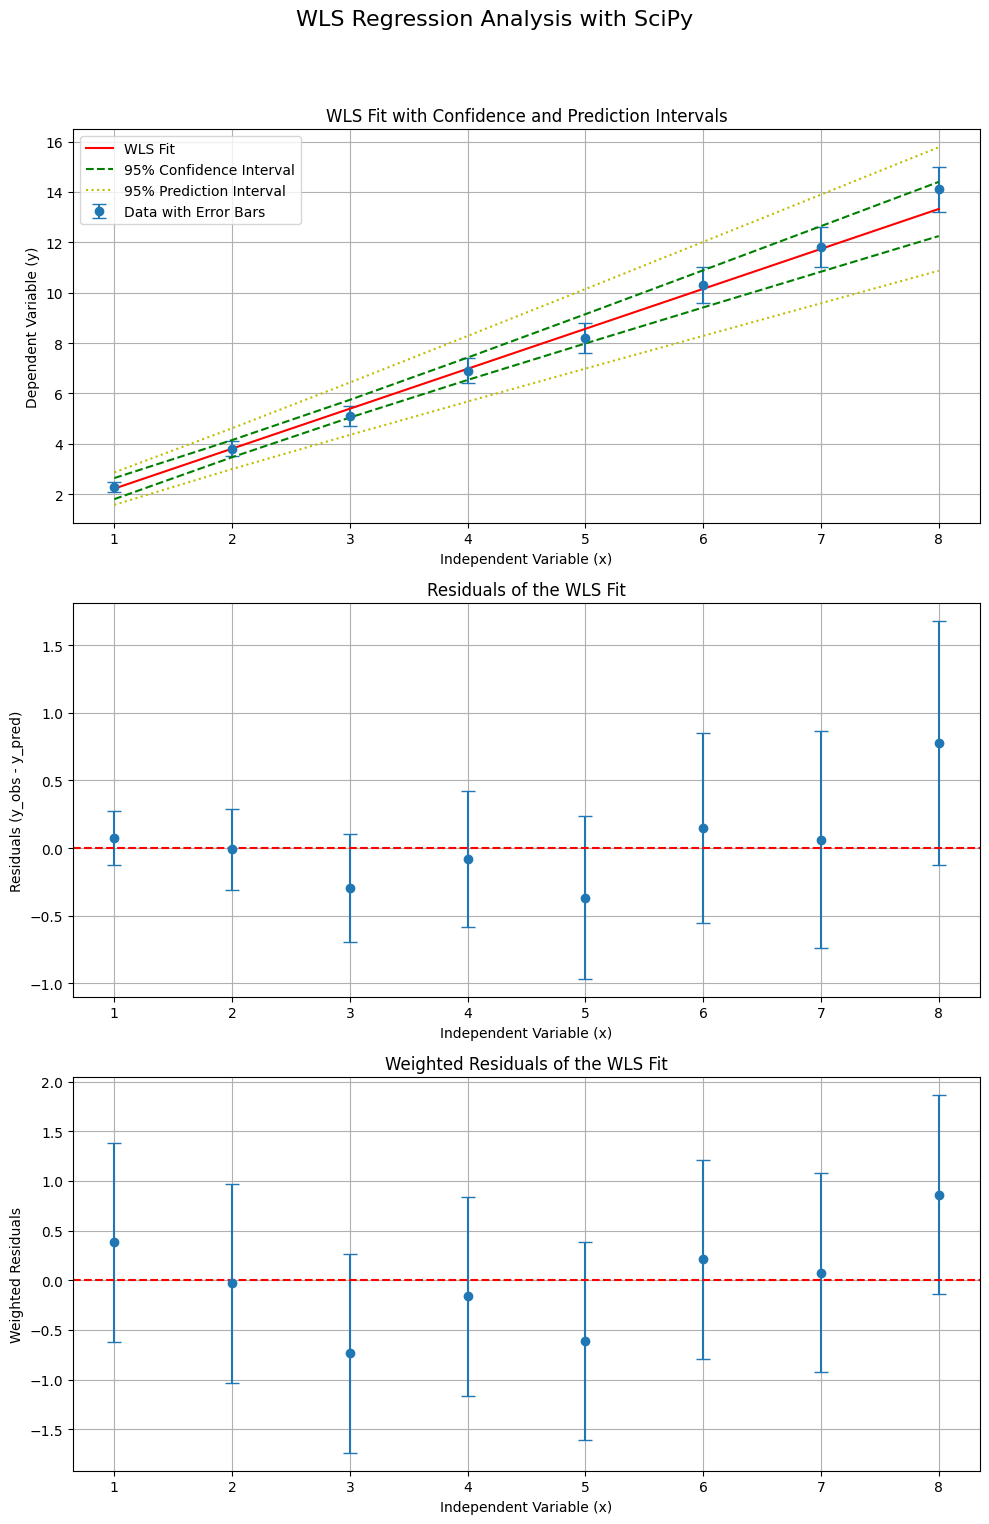

In [64]:
# --- Generate and display plots ---
# Create a matrix X for manual calculation of intervals
X = np.vstack((np.ones_like(x), x)).T

# --- Calculate Confidence and Prediction Intervals Manually ---
# Critical t-value for 95% confidence
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha / 2, df=degrees_of_freedom)

# 1. Confidence Interval for the mean response
# SE(y_hat) = sqrt(diag(X @ pcov @ X.T))
se_mean = np.sqrt(np.diag(X @ pcov @ X.T))
ci_lower = y_pred - t_crit * se_mean
ci_upper = y_pred + t_crit * se_mean

# 2. Prediction Interval for a new observation
# PI = y_hat +/- t * sqrt(sigma_i^2 + SE(y_hat)^2)
# Here sigma_i is the std dev of the individual point
se_pred = np.sqrt(sigma**2 + se_mean**2)
pi_lower = y_pred - t_crit * se_pred
pi_upper = y_pred + t_crit * se_pred

# --- Plotting ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 16))
fig.suptitle('WLS Regression Analysis with SciPy', fontsize=16)

# Plot 1: WLS Fit with Confidence and Prediction Intervals
ax1.errorbar(x, y_obs, yerr=sigma, fmt='o', label='Data with Error Bars', capsize=5)
ax1.plot(x, y_pred, 'r-', label='WLS Fit')
ax1.plot(x, ci_lower, 'g--', label='95% Confidence Interval')
ax1.plot(x, ci_upper, 'g--')
ax1.plot(x, pi_lower, 'y:', label='95% Prediction Interval')
ax1.plot(x, pi_upper, 'y:')
ax1.set_xlabel("Independent Variable (x)")
ax1.set_ylabel("Dependent Variable (y)")
ax1.set_title("WLS Fit with Confidence and Prediction Intervals")
ax1.legend()
ax1.grid(True)

# Plot 2: Residuals Plot
ax2.errorbar(x, residuals, yerr=sigma, fmt='o', capsize=5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel("Independent Variable (x)")
ax2.set_ylabel("Residuals (y_obs - y_pred)")
ax2.set_title("Residuals of the WLS Fit")
ax2.grid(True)

# Plot 3: Weighted Residuals Plot
# The error on the weighted residuals is 1.0 because they are normalized by sigma.
ax3.errorbar(x, weighted_residuals, yerr=np.ones_like(x), fmt='o', capsize=5)
ax3.axhline(y=0, color='r', linestyle='--')
ax3.set_xlabel("Independent Variable (x)")
ax3.set_ylabel("Weighted Residuals")
ax3.set_title("Weighted Residuals of the WLS Fit")
ax3.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()